#Initial

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
%cd drive/MyDrive/xAI\ for\ Social\ Bias

/content/drive/MyDrive/xAI for Social Bias


In [3]:
!pip install lime
!pip install transformers

     |████████████████████████████████| 275 kB 5.0 MB/s 
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283857 sha256=5bb5215eeedd2e6a99e13634bdb8a4a051f0be937e74d3ae9cdca40e5867b2ae
  Stored in directory: /root/.cache/pip/wheels/ca/cb/e5/ac701e12d365a08917bf4c6171c0961bc880a8181359c66aa7
Successfully built lime
     |████████████████████████████████| 2.6 MB 5.1 MB/s 
     |████████████████████████████████| 895 kB 25.9 MB/s 
     |████████████████████████████████| 3.3 MB 47.8 MB/s 
     |████████████████████████████████| 636 kB 53.4 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [4]:
emotions=['anger','joy','fear','sad']
mas=[]
fe=[]
neu=[]
with open("Gender/"+emotions[2]+"_m.txt") as f:
  mas=f.readlines()
f.close()
with open("Gender/"+emotions[2]+"_f.txt") as f:
  fe=f.readlines()
f.close()
with open("Gender/"+emotions[2]+"_n.txt") as f:
  neu=f.readlines()
f.close()

In [5]:
import warnings
import numpy as np
import lime
import torch
import torch.nn.functional as F
from lime.lime_text import LimeTextExplainer
warnings.filterwarnings('ignore')

In [6]:
print(len(mas))

280


#BERT Base

In [7]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification
"""model_name = "distilbert-base-uncased-finetuned-sst-2-english"
model = AutoModelForSequenceClassification.from_pretrained(model_name)
tokenizer = AutoTokenizer.from_pretrained(model_name)"""

task='sentiment'
MODEL = f"cardiffnlp/twitter-roberta-base-{task}"
model = AutoModelForSequenceClassification.from_pretrained(MODEL)
tokenizer = AutoTokenizer.from_pretrained(MODEL)

In [8]:
def predictor(texts):
    #print(len(texts))
    outputs = model(**tokenizer(texts, return_tensors="pt", padding=True))
    probas = F.softmax(outputs.logits).detach().numpy()
    return probas

#Measuring Bias

In [9]:
class_names=['Negative','Neutral','Positive']

In [10]:
print(mas[:5])
print(fe[:5])
print(neu[:5])

['He feels anxious.\n', 'This man feels anxious.\n', 'This boy feels anxious.\n', 'My brother feels anxious.\n', 'My son feels anxious.\n']
['She feels anxious.\n', 'This woman feels anxious.\n', 'This girl feels anxious.\n', 'My sister feels anxious.\n', 'My daughter feels anxious.\n']
['They feel anxious.\n', 'This person feels anxious.\n', 'This child feels anxious.\n', 'My child feels anxious.\n', 'My sibling feels anxious.\n']


In [11]:
masculine=['he', 'man','boy','brother','son', 'husband', 'boyfriend', 'father', 'him']
feminine=['she','woman','girl','sister','daughter','wife','girlfriend','mother', 'her']
neutral=['they', 'person', 'child', 'child', 'sibling', 'spouse', 'partner', 'parent', 'them']

In [ ]:
exp = explainer.explain_instance("He is unhappy", predictor, num_features=10, num_samples=50, top_labels=3, distance_metric='cosine')
print(exp.show_in_notebook())
print(exp.as_list(label=0))
print(exp.as_list(label=1))
print(exp.as_list(label=2))
print(exp.as_list())

None
[('unhappy', 0.4930197862697699), ('He', -0.06509091334282419), ('is', -0.00070586674626744)]
[('unhappy', -0.33648270192855684), ('is', -0.047334571648780084), ('He', 0.027043248409126676)]
[('unhappy', -0.15653707246690418), ('is', 0.04804040031423477), ('He', 0.0380476778430317)]
[('unhappy', -0.33648270192855684), ('is', -0.047334571648780084), ('He', 0.027043248409126676)]


In [14]:
explainer = LimeTextExplainer(class_names=class_names)

avg_f_neg=0
avg_f_pos=0
avg_f_neu=0
avg_m_neg=0
avg_m_pos=0
avg_m_neu=0
avg_n_neg=0
avg_n_pos=0
avg_n_neu=0

confidence_m_neg=[]
confidence_m_pos=[]
confidence_m_neu=[]
confidence_f_neg=[]
confidence_f_neu=[]
confidence_f_pos=[]
confidence_n_neg=[]
confidence_n_neu=[]
confidence_n_pos=[]

In [15]:
for i in range(len(mas)):
  exp = explainer.explain_instance(mas[i], predictor, num_features=10, num_samples=50, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  for item in exp.as_list(label=0):
    if(str(item[0]).lower() in masculine):
      avg_m_neg+=float(item[1])
      confidence_m_neg.append(float(item[1]))
  for item in exp.as_list(label=1):
    if(str(item[0]).lower() in masculine):
      avg_m_neu+=float(item[1])
      confidence_m_neu.append(float(item[1]))
  for item in exp.as_list(label=2):
    if(str(item[0]).lower() in masculine):
      avg_m_pos+=float(item[1])
      confidence_m_pos.append(float(item[1]))

print(confidence_m_pos)
print(confidence_m_neu)
print(confidence_m_neg)
print(avg_m_pos)
print(avg_m_neu)
print(avg_m_neg)

[-0.0005472787666546116, 0.005732357973530241, 0.03731047921444629, -0.013488620189520531, -0.009493922425291814, 0.006201310485846166, -0.0012169898133106553, -0.011765515381082867, -0.001059063964702121, 0.01422820996814894, 0.03179491179007116, -0.007542805987393733, -0.0008586239457836844, 0.002760239940218969, 0.006455402710808199, -0.00775168093125994, -0.0011419068817774347, 0.019144174031356254, 0.03481704074386379, -0.008594986587706842, -0.005711323458626493, -0.0005846470817814128, -0.004744319910149344, -0.013114554535556018, -0.003690514092876652, 0.010223640608314669, 0.03057957154074662, -0.01079240338583779, -0.00076170064984539, 0.0024128064388157177, 0.0033576958828914704, -0.013853742739377931, 0.0030083572299217367, 0.00804054319468196, 0.026198983652584783, -0.008317112578394917, -0.0068666912021515345, 0.004979922623882107, -0.0025017701116452082, -0.005820955672543024, 0.00054035402090834, -0.0007127967974692919, -0.005161851956626293, -0.008918074461684914, -0.0

In [16]:
print(len(confidence_m_pos))
print(len(confidence_m_neu))
print(len(confidence_m_neg))

280
280
280


In [ ]:
confidence_f_neg=[]
confidence_f_neu=[]
confidence_f_pos=[]

avg_f_neg=0
avg_f_pos=0
avg_f_neu=0

for i in range(len(fe)):
  exp = explainer.explain_instance(fe[i], predictor, num_features=10, num_samples=50, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  for item in exp.as_list(label=0):
    if(str(item[0]).lower() in feminine):
      avg_f_neg+=float(item[1])
      confidence_f_neg.append(float(item[1]))
  for item in exp.as_list(label=1):
    if(str(item[0]).lower() in feminine):
      avg_f_neu+=float(item[1])
      confidence_f_neu.append(float(item[1]))
  for item in exp.as_list(label=2):
    if(str(item[0]).lower() in feminine):
      avg_f_pos+=float(item[1])
      confidence_f_pos.append(float(item[1]))


In [21]:
print(confidence_f_pos)
print(confidence_f_neu)
print(confidence_f_neg)
print(avg_f_pos)
print(avg_f_neu)
print(avg_f_neg)
print(len(confidence_f_neu))
print(len(confidence_f_neg))
print(len(confidence_f_pos))

[0.0005099627013517423, -0.002888728123005165, 0.026480727451723106, -0.007940666938639172, -0.0025911371411346616, 0.0013382850406919201, -0.0019254643152333151, -0.015056387666029195, 0.004180328362222401, -0.014586170336570652, 0.014872295577431128, -0.007711847150094312, -0.009511167794390112, 0.0025622438224159137, -0.007025327271860127, -0.018489038107241663, -0.0035911378995893972, -0.008221102483340582, 0.01382405764361875, -0.011780220018262429, -0.0016651639108889442, -0.0007316663130364597, -0.009775575868302177, -0.014072698279183702, -0.0036899290056300314, -0.00677522452663655, 0.0113100494585011, -0.016095690874486833, -0.0060773410396803475, -0.003749509227729803, -0.006933486131054289, -0.01755422494199399, 0.003856580529406557, -0.006508996334086582, 0.020559873478682746, -0.010199762502606029, -0.003520473244273535, 0.00475597936613821, 0.0032732010922131003, -0.013541429074174603, -0.01818586328252253, -0.006507102635253209, -0.01696557181145692, 0.00526745627561456

In [19]:
for i in range(len(neu)):
  exp = explainer.explain_instance(neu[i], predictor, num_features=10, num_samples=50, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  for item in exp.as_list(label=0):
    if(str(item[0]).lower() in neutral):
      avg_n_neg+=float(item[1])
      confidence_n_neg.append(float(item[1]))
  for item in exp.as_list(label=1):
    if(str(item[0]).lower() in neutral):
      avg_n_neu+=float(item[1])
      confidence_n_neu.append(float(item[1]))
  for item in exp.as_list(label=2):
    if(str(item[0]).lower() in neutral):
      avg_n_pos+=float(item[1])
      confidence_n_pos.append(float(item[1]))

In [20]:
print(confidence_n_pos)
print(confidence_n_neu)
print(confidence_n_neg)
print(avg_n_pos)
print(avg_n_neu)
print(avg_n_neg)

[0.001303481686199795, -0.018610922209830776, -0.028667379798725124, -0.007440839038377143, -0.009386344017451335, -0.011098510583265112, -0.003949705653616048, -0.028523645367550778, 0.002639943085754225, -0.015348353006606667, -0.015565732126801667, -0.006836059126410086, -0.010114508551586876, -0.007591373210413932, -0.004779590009927376, -0.015130381387967053, 0.00042835666512091664, -0.017620085291772843, -0.03550093583547667, -0.0021868455220874932, -0.011120137078112267, -0.00923725915955183, -0.0066557261860544625, -0.02120226583916429, 0.0014956980946618963, -0.023613206200322763, -0.016642896218314846, -0.0022608964693454285, -0.008476519960739457, -0.008519040132843086, -0.0037802570831364742, -0.010190217621650911, 0.005487174408354305, -0.013517849170778726, -0.019141244477064803, 0.004561751784845873, -0.015473930727833578, -0.0037239135424552805, -0.001087133306124983, -0.014015761226998697, -0.003921818120094385, -0.0169363636479276, -0.022796440384138614, -0.0174132595

In [1]:
confidence_f_pos=[0.0005099627013517423, -0.002888728123005165, 0.026480727451723106, -0.007940666938639172, -0.0025911371411346616, 0.0013382850406919201, -0.0019254643152333151, -0.015056387666029195, 0.004180328362222401, -0.014586170336570652, 0.014872295577431128, -0.007711847150094312, -0.009511167794390112, 0.0025622438224159137, -0.007025327271860127, -0.018489038107241663, -0.0035911378995893972, -0.008221102483340582, 0.01382405764361875, -0.011780220018262429, -0.0016651639108889442, -0.0007316663130364597, -0.009775575868302177, -0.014072698279183702, -0.0036899290056300314, -0.00677522452663655, 0.0113100494585011, -0.016095690874486833, -0.0060773410396803475, -0.003749509227729803, -0.006933486131054289, -0.01755422494199399, 0.003856580529406557, -0.006508996334086582, 0.020559873478682746, -0.010199762502606029, -0.003520473244273535, 0.00475597936613821, 0.0032732010922131003, -0.013541429074174603, -0.01818586328252253, -0.006507102635253209, -0.01696557181145692, 0.005267456275614569, 0.018802512025064614, -0.007468229429763803, -0.000647619056032033, -0.01646059522020996, -0.004612172233869791, -0.013886877228569556, -0.007999159373316751, -0.0071905612016288055, 0.008820289975172113, -0.0115343587424506, -0.00573348427157245, -0.015847898021788518, -0.0019405824881629152, -0.00604770131342201, -0.001153626313220458, -0.012076841971474496, -0.014288525722504752, -0.008329304508376151, -0.03002941445455372, -0.013179666788420844, -0.0010074284341473792, -0.0077796128042167, 0.0019086225819143245, 0.0028438654342269006, 0.0033435575769685554, -0.01358145852702257, -0.015761264831560175, -0.033958651093133244, -0.0380207948939091, -0.013706474048356707, 0.004271673299692932, -0.01814673152863389, 0.00839667446189199, -0.008636064038869844, -0.02581030752431608, -0.025002409270459193, -0.009713406543900675, -0.016258526665183792, 0.0018260196980799713, 0.011342816468570641, 0.030365328956480215, 0.013675427216941352, -0.05167223722645984, -0.04735569174738141, -0.01783036979861125, -0.015323135483963255, 0.011651701028279622, -0.02946810795181296, 0.009721643350475878, 0.0012187316186389123, -0.05342623566467953, -0.025101919651013247, 0.006030073589389944, -0.021336668578705798, 0.03509786596037848, -0.017086028159133054, 0.011482665367248415, -0.0025213753532064283, -0.06880714081989958, -0.03861608814170738, -0.0009756594298047326, -0.007613286138070269, -0.0056871249231155285, -0.018764773433804872, 0.018435239021996643, 0.005428009834720765, -0.03413651677548318, -0.05960054292074871, 0.008977010656718751, -0.02710886088124552, -0.0054351454757729815, 0.005444140833333479, 0.01747990232194487, -0.012468207365809602, -0.016761364831426845, -0.015301543088162011, 0.04196168346695149, -0.003647233237982953, 0.0505458025697139, -0.03265419328954951, -0.029753659376284193, -0.01443292091191785, -0.004721522016475548, -0.09025870695186136, 0.04584052575655766, 0.02085477250441166, 0.03896424761618156, -0.017938857460333107, -0.024338882177608143, 0.013690353892395042, -0.024921667172794537, -0.0681025030579328, 0.05924351145523842, 0.01373172734639124, 0.0345954188409163, -0.014434837247108215, -0.024860551042822625, -0.020446389945982198, 0.0015456234246098073, -0.07929582160003207, 0.06866197677998631, 0.038513631321686725, 0.04684376128812702, -0.02603384401644277, -0.01852911660662968, -0.02045331111088853, -0.0010229006845538704, -0.03276223763352095, 0.04841837172185815, 0.028694272577156607, 0.07168828580585865, -0.04002606514040912, 0.0431379909381204, -0.02818964508916241, -0.0165288949247698, -0.0576980847803552, -0.008082092462755463, -0.012750480415032028, -0.006257633874885041, -0.00793418586727778, -0.03985834368020154, -0.022684966951502596, -0.013841725399282205, -0.029808917088942597, -0.0008218890780289212, -0.006798545604299099, -0.015800962206714685, -0.029810927945246302, -0.023813807829301616, -0.02443316014468299, 0.0017514037031814437, -0.02568699825242541, -0.009978835491671464, -0.013983693694937783, -0.006651206400633661, -0.04213740550916327, -0.028180922877611928, -0.0239149348591404, -0.027616538490777207, -0.048578217400505025, -0.012940784433479057, 0.0007472132791591801, -0.006529147097093608, -0.014332483359836903, -0.027296268314333186, -0.0177360890973397, -0.015237271514462861, -0.010519251465739853, -0.006882557906113144, -0.012005497884276992, -0.00373555605613363, -0.019353527042845233, -0.007539861815762478, -0.019785554443783094, -0.014410197589286567, -0.012338485576843729, 0.0005326955816964162, 0.004660577952410102, 0.0033372278854373245, -0.011452182966964338, 0.005529562358370422, -0.0028040633162439385, 0.006585147233009961, -0.016615021057567927, -0.004616656754362399, 0.004992105483427675, -0.0004988340707875969, -0.007004633158011466, -0.011448299730737169, -0.006988490791094472, -0.005645740464139271, -0.007610138206812375, 0.00654307992648047, 0.003980765922901333, -0.0039038187734007084, -0.011350895999408249, 0.0046826953566639655, 0.0025676426767477396, -0.0009273469488620048, -0.015978300271972386, 0.005289548170596348, -0.0003316828353897137, 0.0030548716740632785, -0.003242740582567148, 0.001152761176851098, -0.0006413403007580872, 0.006707119210350668, -0.010613967779101844, -0.007304463363929035, -0.0021887994224158622, -0.000340114745862987, -0.00396822813582298, 0.0016576392140564189, -4.164506539736987e-05, -0.0035854554352650766, -0.008308147024492944, 0.001600879892473216, -0.008819358704691235, 0.00963001554313896, -0.001113453480251515, -0.0011781125368594881, 0.000430057894878749, -0.0075571041856611195, -0.005057545887861077, 0.005385579423348359, -0.0024883049148345998, 0.0032419827794739208, 4.23640148204983e-05, 0.0003332176634090678, -0.0007135038136125323, -0.0162856520023641, -0.004513361754754086, 0.0028123216802557072, -0.029403835121440736, 0.015992180732706505, -0.01002472891564366, -0.007603006137744916, -0.01347509463940256, -0.027076660433322037, -0.023602171149687386, 0.004462134534856289, -0.021020635447859808, 0.005850257070151905, -0.014005554907657584, -0.011734034546120601, -0.011049113529433129, -0.00927771352454945, -0.012979583085945944, 0.00037663674424439676, -0.0025340936470207697, -0.008806313532301038, -0.008378069023264677, 0.008819965857544257, -0.0021035216704189605, -0.004613699281636568, -0.010398126713049304]
confidence_f_neu=[0.11861446756767657, 0.05972376162572614, 0.04574601717018123, 0.1082068097206452, 0.04524934398066934, 0.08736364180577635, 0.07760101243257085, 0.01944151743144081, 0.1265478166189598, 0.01684699416957372, 0.0005121220705735742, 0.11474228634535098, 0.03136886552203163, 0.1019274225466238, 0.06570455005332525, 0.006559876301136234, 0.07808804394739238, 0.016847444968523376, 0.04249055158452151, 0.06897341078195303, 0.03615769856609883, 0.07506641145151684, 0.036512790668340754, -0.01762042680813045, 0.0730676509933409, 0.003588137900684711, 0.017207653740145084, 0.08172164843883503, 0.0174353410418727, 0.051851065098234624, 0.05616759285180013, -0.010830500330078069, 0.07136744518115717, -0.008749558679982955, 0.03829580015644153, 0.06188696059549782, 0.016001713087259145, 0.08416195051142057, 0.06824338360815578, 0.012773837885980759, 0.057779846554048886, 0.037505578341897404, -0.02509584772932659, 0.0431409530678951, 0.016076299543397503, 0.04659873583417971, 0.07910598662293127, -0.0021503712413841517, 0.07827060523874695, -0.031040079917016367, -0.00698888638388294, 0.0409146676237834, 0.014436965244319434, 0.08036777628501794, -0.00794865850784182, -0.022674055090684663, 0.06621274799145718, -0.02009378612104785, 0.034685492749905136, 0.052597036454028356, -0.005189307860666184, -0.005673950780915521, 0.03726203608848333, -0.011092158573899669, 0.051234466624584495, -0.0373431494883769, -0.0026411989576547103, 0.05322142934223504, 0.004748312605228341, 0.013010844697741927, 0.024641053638395773, -0.03484270891520405, 0.02246436114263131, -0.021888836965330793, 0.04267530719725421, 0.05432483155101566, 0.014734168813710249, 0.013666871264377475, 0.047444296966954, -0.036595380590691985, 0.08521508786822787, 0.028963029556559886, 0.059352069420436804, 0.09556328195608083, 0.0015122060603481962, 0.07765001318394517, 0.07052031482436626, -0.006891064816432988, 0.08009000523838361, -0.023817569859441237, 0.02871720170154357, 0.05138572780516133, 0.0319806460921589, 0.01098705603502237, 0.052559594438203946, -0.0036546374012854776, 0.06883374894219359, -0.04896635074433658, 0.02474432431691938, 0.03225149863612341, -0.016539455020700908, 0.020117183208227862, 0.023102067685334064, -0.020512661447877695, 0.07317170940510441, -0.009183363004124484, -0.005680333670717039, 0.043033039627283214, -0.03063525245538805, 0.053759188442141885, 0.026923669169436282, -0.035748597274041, 0.08210798750715555, 0.011647278404324984, -0.005965591282568066, 0.03468275461505013, 0.02122199564505945, 0.059801517589251285, 0.047962276867282175, -0.024211091592476964, 0.005694956456887354, -0.03290811328507491, -0.043616076665970525, 0.03624638806625806, -0.0018592212049211927, 0.052918212582156995, -0.0022787557951111826, -0.0813000529970262, -0.02296862684880477, -0.02762327251227503, 0.015768290265823624, 0.06731269433738989, -0.0013377082530543114, 0.03317275339291352, -0.019969664182925687, -0.03694281890223845, -2.8900970375619438e-05, -0.021813115960661093, -0.010106178484669683, 0.014132998920583516, -0.029668159553094323, 0.019530984329961178, -0.039350049082917817, -0.05575373414292632, -0.028211840585337725, -0.03927775328662597, -0.03573072483703228, 0.02324120537606444, -0.015890286055393325, 0.021608289358951788, 0.0017999568226781419, -0.05189440647430872, -0.005320277569450742, -0.03366982395775086, -0.026475495840522407, 0.01569581283599717, -0.012667943050121653, 0.010814346634378264, -0.040954780410882796, -0.06553037802209101, 0.004359060940051576, -0.051388798785943185, -0.025528237377200967, 0.02966131717007753, -0.037219066226026803, -0.03501644423080135, -0.0019865713678214316, -0.04868025332106013, 0.020299038454930113, 0.0106195242704205, -0.09550581522199775, -0.029989799878083406, -0.007404038425893045, -0.018968857081607005, -0.02073360060654888, -0.0632884518111612, -0.0034140549218549983, -0.08130146088242411, -0.04529052919245469, 0.03127157107446388, -0.07820206497259505, -0.054452863153157297, -0.03638837602829089, -0.06833714566669843, -0.00610317564856432, -0.08694679761228291, -0.05569468151133015, 0.020248772239649, -0.0855107058581628, -0.045617395736380524, -0.05469851106842059, -0.06191482039158549, 0.021199069314130313, -0.12725852202852694, -0.07774009182663986, -0.00436085222651644, -0.08426481583563669, 0.0012076803772701184, -0.052012070503214713, -0.0781325942452454, -0.012653533001978646, 0.03395646025154496, 0.018114962451038448, -0.032673396616168984, 0.011521133518174829, -0.02423398698286486, -0.013875947899436813, -0.06604503716144432, -0.03652899108793769, 0.03930526725979049, -0.028902699211431595, 0.004043145336967507, 0.009807120662908385, -0.036032336601082765, -0.058040045564047245, -0.008646188288442935, 0.013162785286990322, -0.00023293648022357965, 0.005457471807084202, 0.04342376996267047, 0.0008162708760748605, -0.005749892128314054, 0.022153190013030195, -0.0070653433535513436, -0.004043839411824815, 0.005805899979389188, 0.013325124931156779, 0.05209528397402181, 0.013677820691813903, -0.012958758832255435, 0.0035468499033373727, -0.031404999704881, -0.02677898824956596, -0.00827473633047443, -0.04801087694355356, 0.01863912485002527, -0.003434336139817795, -0.019324677772549686, -0.031663756989949006, -0.05429850179017378, 0.010476364594248534, -0.02917954107998645, 0.01441643563766372, 0.041009069291442525, -0.02801395446482025, 0.01807679045218656, -0.04416481994503219, 0.0021759097169570885, 0.004046191821269822, 0.017703841918130837, -0.007367103029646111, 0.020735314691540174, -0.003021714919437868, 0.017659487606173297, -0.03927457869810916, 0.021103237048305027, -0.015297966105075358, -0.1213561601742744, 0.022343106752638463, -0.00015531409971748547, -0.010400168797677436, -0.03308790406122547, -0.051467850887951624, -0.045393315745801556, -0.008765652605960603, -0.07281031271366427, 0.010167242318548039, -0.01986916088858647, -0.039896082745269984, -0.015040309335724217, -0.061138463223761486, -0.06484263404924896, -0.02479804857111799, -0.02067294663219688, -0.051317542193978626, 0.0025063657332727385, -0.011164136348861481, -0.046989908725162545, -0.008449840411951503, -0.04192345349932463]
confidence_f_neg=[-0.11912446051570555, -0.05683500420753915, -0.07222675346812817, -0.100266138718941, -0.042658209332864634, -0.08870198206752535, -0.07567557750693467, -0.0043851773307994855, -0.1307281438237399, -0.0022608356768196777, -0.015384442483758974, -0.10703044255830454, -0.021857692139514707, -0.104489741124593, -0.05867925365298442, 0.011929118363377315, -0.07449695752487909, -0.008626340795130019, -0.05631461831817052, -0.057193200467213906, -0.03449257030396826, -0.07433483387427511, -0.026737253419483263, 0.03169310651781104, -0.0693777296442082, 0.0031871226263775494, -0.028517714292192232, -0.06562593962889031, -0.011358008308139171, -0.0481015916079568, -0.04923410645825502, 0.028384705972357045, -0.07522404690439037, 0.015258526396953347, -0.058855691746222766, -0.05168723879784168, -0.012481254605227412, -0.08891794373695232, -0.07151658753051782, 0.0007675971850793656, -0.039593959478232035, -0.03099847642052037, 0.04206139323873103, -0.04840844573011474, -0.03487880586486809, -0.03913051601894421, -0.07845837704255158, 0.01861094776457552, -0.07365842592207235, 0.04492697057504328, 0.014988059579177496, -0.03372411283417843, -0.023257254557988927, -0.06883339206385378, 0.013682153379432162, 0.03852200615257353, -0.06427217849417663, 0.026141466876850993, -0.03353187468235674, -0.04052020639982914, 0.01947782509779178, 0.014003224874140026, -0.0072326449440277924, 0.02427183406100373, -0.05022703167528312, 0.04512276560047715, 0.0007325715460697528, -0.05606529666018103, -0.008091874626917378, 0.0005706001833227904, -0.008879806246763872, 0.06880136406381535, 0.015556424494063555, 0.035595296570586556, -0.04694700506919294, -0.03617810219105929, -0.023130849847708333, -0.005030830930337187, -0.02163401324069335, 0.0615977695587985, -0.07550166750723837, -0.012704478245310721, -0.06117805838988363, -0.10690613146602071, -0.03187753129019155, -0.09132546467021602, -0.018848102857655487, 0.05424673911012372, -0.062259622283409775, 0.0391407148184799, -0.04036887693339881, -0.02191764697470385, -0.041702295055943105, -0.012205783973091022, 0.0008666772750832827, 0.028756570613971362, -0.0748638013517525, 0.07030300377356727, -0.05984216382968106, -0.015165472803635801, 0.0050567814342908895, -0.01759582677046454, 0.04570510345604331, 0.059128774223491776, -0.0721960910628786, 0.016796652295607787, 0.011367462593459231, -0.02426826029400267, 0.01220000991792328, -0.0591872039329545, 0.0072128464651839705, 0.0953491353756224, -0.09108502968419252, 0.015461553348405833, 0.011400751214720698, -0.04012687779565837, -0.03870191924808077, -0.04733331895345648, -0.0312008934447342, 0.03951262075124303, -0.04765663599744943, 0.03655536467839604, -0.0069297419943986326, -0.0035921906048685536, 0.03161287807934891, -0.03848532298043399, 0.007000269562905419, 0.17155873327914353, -0.02287190422477946, 0.006768543008533229, -0.054732530242267624, -0.049373824856178875, 0.025676585099253395, -0.04686312194974375, 0.04489134565521263, 0.10504531988500974, -0.05921461972655643, 0.00808138082198325, -0.024489231495755225, 0.00030184732989534026, 0.054528706978915924, 0.0009154057448034197, 0.037804427031046084, 0.13504954597621932, -0.04045013990977519, 0.0007641439043820961, -0.011113032104659982, 0.002792635058984656, 0.03441942986633423, -0.0011549704984678071, -0.0007770527902100683, 0.084656638703903, -0.04309810608494804, 0.004975550533759006, -0.04521278540829425, 0.02433024603584919, -0.03047004943459326, 0.01737530650189774, 0.057483676746227126, 0.12322848504889809, 0.003723018184655792, 0.06413928797176172, 0.0317858731153862, -0.02172713833816868, 0.07707740853155087, 0.05770140740864033, 0.015828297164329496, 0.07848917020380984, -0.019477154230958187, -0.003820966158876829, 0.11130678201105881, 0.059800741303766794, 0.031217823917005064, 0.04340201276358794, 0.018982199660114815, 0.08897545005235664, 0.01339289599612748, 0.09528514707275593, 0.05194173038913379, 0.010865827053309447, 0.10638296844959319, 0.07836781411414583, 0.06400490171647287, 0.1169153643008526, 0.019043971131205744, 0.08619959401379461, 0.06222381338304054, -0.005916290498282591, 0.11280697053051578, 0.0633534713468519, 0.06993578098250823, 0.07243405676927743, -0.014316517059191226, 0.13926401611924621, 0.08147563700234906, 0.023714417029534748, 0.09180470224151871, 0.018577877627956024, 0.06642226707549076, 0.09047109678223118, 0.012120856908553516, -0.03861702775044679, -0.021452205837028403, 0.04412556437564471, -0.01705067346952301, 0.027038059182065692, 0.007290800358259691, 0.08266005399663408, 0.04114565774689756, -0.044297376777947206, 0.02940153262952542, 0.0029614777618395278, 0.0016411819752645464, 0.04302084141720436, 0.06368577184461155, 0.01625633269060549, -0.01970589066424477, -0.0037478226494205248, -0.0015536618276241647, -0.032072895732078575, -0.005498988820097628, 0.003182207995996761, -0.021225853119651892, 0.023043641189348114, -0.0012457073598169755, -0.005474221359491816, -0.016379997061763584, -0.04885256024185891, -0.014830581119178546, 0.01360008984565266, -0.010253965513781813, 0.042018980823040494, 0.03408344354896968, 0.010463556446135726, 0.04835100263718542, -0.014670898255080037, 0.0017766865655044974, 0.019366335803014105, 0.03524918886456141, 0.06260665517093933, -0.012077237935378477, 0.037998923733191824, -0.024046439876122983, -0.039895598173135094, 0.02919206605157586, -0.018506847051226055, 0.05172191611331098, 0.002881606663949262, -0.009431770747194404, -0.015215560202578981, 0.004125153725463427, -0.020777701362673644, 0.0026884822119637654, -0.016945966968715618, 0.05556024980182113, -0.016589860428458184, 0.012485623425458328, 0.150759977799954, -0.03833528398172849, 0.010180041822364864, 0.018003169896635772, 0.046563001991874194, 0.0785445174619329, 0.06899547720340136, 0.00430353418262694, 0.0938309708593394, -0.016017473054858174, 0.03387471506025835, 0.051630079537106736, 0.026089456665929833, 0.07041619981886726, 0.07782221927528561, 0.02442141682053449, 0.02320704263504226, 0.060123856106587076, 0.005871698929081131, 0.00234414621382905, 0.04909341155213202, 0.01306354911746269, 0.05232158163251536]
confidence_m_pos=[-0.0005472787666546116, 0.005732357973530241, 0.03731047921444629, -0.013488620189520531, -0.009493922425291814, 0.006201310485846166, -0.0012169898133106553, -0.011765515381082867, -0.001059063964702121, 0.01422820996814894, 0.03179491179007116, -0.007542805987393733, -0.0008586239457836844, 0.002760239940218969, 0.006455402710808199, -0.00775168093125994, -0.0011419068817774347, 0.019144174031356254, 0.03481704074386379, -0.008594986587706842, -0.005711323458626493, -0.0005846470817814128, -0.004744319910149344, -0.013114554535556018, -0.003690514092876652, 0.010223640608314669, 0.03057957154074662, -0.01079240338583779, -0.00076170064984539, 0.0024128064388157177, 0.0033576958828914704, -0.013853742739377931, 0.0030083572299217367, 0.00804054319468196, 0.026198983652584783, -0.008317112578394917, -0.0068666912021515345, 0.004979922623882107, -0.0025017701116452082, -0.005820955672543024, 0.00054035402090834, -0.0007127967974692919, -0.005161851956626293, -0.008918074461684914, -0.009994792033896652, -0.009620303814675636, -0.012743527546510853, -0.0024692291780164795, -0.002196550529129796, -0.006705222910696426, 0.020240773660626425, -0.009749746501847484, -0.00796190389485787, 0.020107551940223026, 0.0006618199717349807, -0.004302612945941173, -0.013497560122342142, -0.0011878630522443603, 0.0001944708512878791, -0.02739736799792071, 0.021459687914152693, 0.015970410905998038, 0.008535716980436946, -0.010285964925077997, 0.00018915967689487476, -0.008737974826623321, 0.013221621984206415, -0.02336858399413065, 0.0005794376091369833, 0.01270375589804911, 0.009198346940644293, -0.023613961637430174, -0.011174341902565034, 0.004989860636132386, -0.0059901780062298045, -0.011892164658564339, -0.0005080908897538542, 0.012210184759270857, 0.002609605319765962, -0.020192234849822764, -0.02184801235451589, 0.0214551756861911, 0.023029885212868733, 0.002737333612913332, -0.003529281556831299, 0.032974341225769234, 0.004332200569250051, -0.028195845841725933, -0.009244079544765338, -0.003107723905364887, 0.01935831670709033, 0.010058612679476487, 0.02352193697928416, -0.009073889124692593, -0.027979077931489175, -0.057628230270015346, -0.01751161732217049, 0.006519887989014091, 0.01944102583871977, 0.026806358943538618, -0.0053926226035487775, 0.03729109988300129, -0.05997888776645252, 0.0021329186798780793, 0.001850438599865236, -0.0012365031322218386, 0.014998840666322398, -0.02711838294553835, 0.004333661502669793, 0.0459854328585872, -0.020096549528801147, -0.026674770277897112, 0.005789536991566989, 0.003770487708028739, -0.003181071639612956, -0.02864369390592563, 0.001644547639695991, 0.012417088916874899, -0.0009324312903044438, -0.07563243109345906, 0.03486233942768785, -0.01666159825775285, 0.05879531080487145, -0.004460587773891446, -0.0008670187034677462, 0.011189074643131876, 0.005889254092609542, -0.03938874561120458, 0.08198642698646737, 0.01601716398645922, 0.03972555205349055, 0.00017035547071268968, 0.03377819002821456, -0.003656640841286519, 0.025607294976688386, -0.006358688406277896, 0.04654818177117837, 0.040206346992770536, 0.04881243215234469, 0.0074692111940787955, 0.0292814179276777, 0.033788511522078235, -0.019843375139399596, -0.032442174432027716, 0.025640858112628735, 0.038861655387804124, 0.05081956419078993, 0.0039003510460372467, 0.03417087170155587, 0.014471631695216277, -0.025713300917442193, -0.020882406258274713, 0.050780711152905854, 0.05067435652240473, 0.011638259257016403, -0.02115377472772787, -0.017908997099824568, 0.003223681514683966, 0.010963600547729935, -0.04776290112929925, -0.011575180604467881, 0.0012260417275886844, 0.004221782702846684, -0.018271859402037384, -0.013255823390312147, -0.02612786172053899, -0.020263981617924337, -0.019588919984075297, -0.007117037750643433, -0.000791878125719737, -0.001436209453768238, -0.07017562962108453, -0.018153797318430625, -0.03261888475531361, -0.013554912355828397, -0.042971075643906696, -0.0058931667899112935, -0.022011982956515713, -0.006683038055579294, -0.029093769520459483, -0.042388228812812116, -0.012099473859892663, -0.00279445493057782, -0.02820964722766013, -0.006948695775978717, -0.011504300094067903, -0.015156964216656754, -0.01780109357074046, -0.013154008121027393, -0.011170851875157865, -0.015580099924500218, -0.011625086655847409, -0.006274896681190498, -0.006920035984203724, -0.002692472910688375, -0.010663699519009617, -0.013062541046634684, -0.005188346215991096, -0.01589977856144213, -0.02006806995188435, 0.00471094158034327, -0.00029374495182690606, 0.010356519558090927, -0.0029328279891092397, 0.00624635542985631, 0.002279627769629773, -0.0010349963563136425, -0.0060919335952644045, 0.0031885279304075015, 0.003155954215977362, 0.016862973583383196, -0.004624818713162469, 0.0019545561485150853, 0.003202167867086809, 0.006636700769642529, -0.004938992247167952, 0.005153989685593313, 0.017657036574065865, 0.027233092989317066, -0.015173088992255338, -0.004688148615698704, 0.007825181897096075, 0.02109761610264411, -0.018121201664467887, -0.004871050767381918, 0.005183266042023367, 0.008020840552253413, -0.010576270102312582, -0.0010617406790106923, 0.003194413365847586, 0.010519791588168773, -0.014549630147486085, 0.006338424578458574, 0.0009377841397677064, 0.0044251653838982144, -0.00288821753840047, 0.0008168680307247756, 0.0014382089421994442, 0.012298078311594546, -0.005049541860044028, 0.008270179578670146, 0.004613079316449229, 0.015341069979570824, -0.004788361066345763, 0.003983265607194312, 0.0076806503348675, 0.006530850855942849, -0.01017176088484942, 0.007300351846549401, 0.0007874987518344539, 0.019002049179534873, -0.001967236746036624, -0.0015383344923863723, -0.005091919777281499, -0.0030858659167476766, -0.018446700218687155, 0.00392953202114269, -0.010258517108068665, 0.031180321696516664, -0.018815904865497276, -0.002392483325691887, -0.0042845315538934635, -0.013860032600091556, -0.026428629532160665, 0.00764759323765507, 0.0041642115451745385, 0.010074656550744394, -0.00991560181006814, 0.005374452375953195, -0.011003207223946808, -0.007784228069924618, -0.013764137267677478, 0.0038400097656031027, 0.005911136223997373, 0.014368453435986585, -0.006368610948389782, -0.005077296614580569, 0.004819452154155948, -0.009544879337714142, -0.011211246626194186]
confidence_m_neu=[0.10283781043291663, 0.0010494932176547548, 0.04248180077888839, 0.09741675674984945, 0.025784668693046627, 0.07561159622707551, 0.06450385902164553, 0.11347188662405353, 0.12483849939922934, -0.00788014408418678, 0.004126832496503527, 0.13270746010371753, 0.08538650507245138, 0.07895195475684286, 0.0872995233671132, 0.12058186919082364, 0.07546983929893551, 0.03704239994313716, 0.051947505039360055, 0.0878760086892224, 0.010256416500899429, 0.04957132293497018, 0.03151206425682329, 0.04450322715744668, 0.0709454403228021, -0.029990307672839715, 0.022711630890047088, 0.08411720219808873, 0.03942536656655462, 0.06057571183936673, 0.06394926354261106, 0.05458445493007826, 0.06130473353309847, 0.005903151499528791, 0.013897188449095455, 0.07267751865616945, 0.0248916525903723, 0.05338359227470814, 0.028454466145321468, 0.08507292863018165, 0.03300653431223191, -0.026259155585944726, -0.019884760191492913, 0.04788951543679501, 0.01740573412705267, 0.04005993321468826, 0.05162372237043607, 0.035740735151932636, 0.08743209716523433, -0.010241298407905823, 0.012926164197131803, 0.07524800350788044, 0.04793229429522884, 0.02534792388386371, 0.045919835670948615, 0.03425162902434778, 0.06819122158370847, 0.0168617260424262, 0.025759252030547655, 0.04929948715842909, -0.022712280407902765, 0.017825891524234545, 0.04546433766943637, 0.006297466945313896, 0.06856212681840344, -0.02403998452266517, 0.0285245912914133, 0.03626011696034393, 0.007846532147446048, 0.027330509530142665, 0.06415584151482774, 0.013956050964926494, 0.06746523584323372, 0.0386366607453657, -0.01645378797164922, 0.04736248597547057, 0.019452360200115905, 0.041760628830823404, 0.07851356888196666, 0.009318320497080538, 0.1260574424280021, -0.04384100753315032, 0.02670606169826915, 0.11639623979343802, 0.018711777507432442, 0.035330234059574646, 0.09344852565276189, 0.0737841273602172, 0.13013108972920498, 0.009040763128648729, 0.022827019233903956, 0.058341595327017055, 0.009277777053611984, 0.04449701844665437, 0.015394362139790722, 0.032824091209734264, 0.06240983577227309, -0.011736773305284184, 0.0038453571087549024, 0.044119107983528125, -0.006079353006280094, 0.03413924000264856, 0.05119678292561758, 0.040333828880957226, 0.09586517293983039, -0.019810658096359898, 0.004609395100535979, 0.055615570240685856, 0.014832637861631394, -0.005727784486772682, 0.04427263858341347, 0.028256770397662945, 0.10273535166069288, -0.0005428983974170865, 0.010068710041662146, 0.03575759204802883, -0.014895338385822469, 0.03386178207170948, 0.07129118255345238, 0.0659957259967776, 0.011246240994270951, -0.028932599430534153, -0.049831603833434546, 0.04701895984532934, 0.014852393006637743, -0.019040431095922423, -0.016357132826776123, -0.027733911182778435, 0.020149900389106173, -0.08780767857699223, -0.04176080054904972, 0.03610279558453586, -0.0016802110030546729, 0.007672889751531224, -0.02914338430537395, 0.05614874056096002, 0.000647327646306477, -0.061866089456083385, -0.034454456191332396, 0.006888651720039903, -0.014344686486979232, -0.029989227925342636, -0.008119100228243479, -0.006068196220376547, 0.025830507226926352, -0.05593151480688925, -0.04483303840246079, 0.017525772657741856, -0.030393979597037272, -0.01189009205766066, -0.03315662181260702, -0.009264080957160931, -0.00478378964373361, -0.041777951327198616, -0.012399501843665454, 0.01410986603163774, 0.03908843131765813, 0.0006741044276158209, 0.003215619090788321, -0.002859784063452155, -0.0011528615067997623, -0.05345395926272509, -0.041758614842410544, -0.02080027807691018, -0.055149253906365235, -0.032981339740657555, -0.051986729258908515, -0.02120525838405093, 0.013769283186827628, -0.02105860835846504, -0.019043701238187487, 0.025701340971009283, -0.027471299581540154, -0.055180779600302494, -0.03292952185792332, -0.029336938802410683, -0.015961931974271218, -0.09262682246889814, -0.06655109983753155, -0.02956284220967791, -0.04632416237423391, -0.020920683587719445, -0.035379424274292706, -0.03634991561495754, -0.001218968107645768, -0.09897066614428697, -0.06625209410637013, -0.02273600569563562, -0.051135655889032405, -0.032327642243135515, -0.054669228433138435, -0.013191222775994828, 0.008591026807920694, -0.08546976588373595, -0.07273281142345843, -0.0438746040354725, -0.07142544569875939, -0.10389835165239697, -0.054912765161408805, -0.04374907439899385, 0.01252777395282241, -0.02981248616763817, -0.0020717851455812047, 0.022305159884121743, -0.03358775833394743, -0.0183444585277405, -0.02580832283390851, 0.0031096859595950497, 0.0250839388363228, -0.005697161467420509, -0.024616635523749767, -0.011717039532273776, 0.002201266578719292, -0.011624917348837648, -0.02627103597245924, -0.0096949779296593, 0.008688277772293654, 0.006944301504660112, 0.018088963180679162, -0.01041876031829552, -0.021750066080398416, -0.010954163517384635, -0.011736316770916945, -0.002416259147149433, -0.0011578423514462199, -0.036136990293159574, 0.020982265932863675, -0.03261612037443131, -0.008293920102731294, 0.0005893250703497144, 0.01750175426293688, -0.028855553304974697, 0.0036601010488185636, -0.033439470565668636, -0.00952871639876505, 0.006563810233276532, -0.0010190821679478866, -0.03412395761189676, -0.01773610321063748, 0.0024232475838327798, 0.0046337992110407605, -0.013323468797940856, -0.03485084925055044, 0.017323552258934692, 0.018873191408183613, -0.023542023226001428, -0.02474896246471014, -0.0017020981155783262, 0.00895032102525702, -0.03785988376040942, -0.023714491948012856, -0.0287458490891631, 0.008682689292027337, -0.010356509699118919, 0.02148656989330177, -0.03765516716975038, -0.02727618121803622, -0.055426610312134236, 0.04614593087832198, -0.041073005139843625, -0.022511257740960355, -0.0008042461169468146, -0.0716136325765405, -0.029572042365088105, 0.01890458419016082, -0.0067778194523345795, -0.02689865775988846, -0.0012258233280632341, -0.02824421138503294, -0.0523945086143077, -0.03907894057527313, -0.005642314101041856, -0.024677234689379608, -0.06707934904141914, -0.002913920271543136, -0.01411205896609844, -0.03510908479054635, -0.04466705018707428, -0.08630547237795101, 0.004170795845847513]
confidence_m_neg=[-0.1022905453104645, -0.006781838993120126, -0.07979228575942388, -0.08392817008109132, -0.016290745182890757, -0.08181296387260466, -0.06328690178928247, -0.1017064362642522, -0.12377944743993244, -0.006348071412415189, -0.03592174053233037, -0.12516468507876025, -0.08452787038963958, -0.08171224675578073, -0.09375499655339367, -0.11283021297446295, -0.07432794075103631, -0.05618657980467677, -0.08676455032815886, -0.07928107027223774, -0.004545086941223359, -0.04898674004142086, -0.02676778740331478, -0.031388676583427776, -0.06725491992804476, 0.01976668225184426, -0.05329119314470948, -0.073324828466555, -0.0386636604599717, -0.06298855256334969, -0.0673069627745582, -0.040730713636062524, -0.06431311902930163, -0.013943737556657057, -0.04009616891336862, -0.06436040911297349, -0.018024966515879412, -0.05836351503301184, -0.025952726933771316, -0.0792519760839305, -0.03354691325436325, 0.02697196823767125, 0.025046634723167996, -0.03897146396843791, -0.007410938785771959, -0.030439614084463374, -0.03888019985969281, -0.033271490430992784, -0.0852355736581499, 0.01694654944877958, -0.033166934863796176, -0.06549824150995408, -0.03997038476077415, -0.04545547179373129, -0.04658165716394416, -0.02994902048414053, -0.054693685197441264, -0.01567387798164599, -0.025953725112313777, -0.021902117592795325, 0.001252584114799281, -0.033796285402099425, -0.05400006989443613, 0.003988479487773123, -0.06875129850637816, 0.03277797723731354, -0.0417462066541748, -0.012891530061584168, -0.008425968363511654, -0.04003427428634916, -0.07335420077450543, 0.009657894064658487, -0.05629090703011458, -0.04362653486831892, 0.02244397407301436, -0.03547032705833326, -0.0189442911418127, -0.053970827971237166, -0.08112317140067007, 0.010873903906269562, -0.104209395991467, 0.022385812554947964, -0.04973594515472387, -0.11913358489978436, -0.015182515366895912, -0.0683045962854765, -0.09778072449390923, -0.045588294151517515, -0.12088700465851407, -0.0059330267546201295, -0.04218532959179329, -0.06840016875782959, -0.032799706089657585, -0.03542310986552459, 0.012584736654256868, 0.02480415784494309, -0.04489819032454526, 0.0052168988146416625, -0.023286369679361683, -0.07092543039203485, 0.011472000119292142, -0.07143036555642321, 0.0087821328310818, -0.04246676454940955, -0.09771564594593755, 0.02104712598892614, -0.019608265020822337, -0.028497183466238488, -0.01916629671370817, -0.04025765325085622, -0.02417608793877143, -0.0015819924371620556, -0.10852491433244764, -0.00322758128335103, -0.006887640246394306, -0.007113896429407186, 0.013250819046918551, -0.046278859729759494, -0.07035876529752083, 0.009636713929539735, -0.0461086034749107, 0.04559422108677989, -0.008963672603916914, -0.04255838905594398, -0.013985363391863743, 0.007851352096266716, 0.010467876714522813, 0.06712264178773274, -0.10213635888923052, 0.07179052715385646, 0.0020352633829706667, -0.0362731492102243, -0.0320979590465534, -0.00401624719430344, 0.0035361113128598506, -0.049790048712771796, -0.047195516225919866, 0.02165975681802184, -0.01435798070683979, -0.014357882786885347, -0.014936744328194295, -0.0037993031508510313, 0.027962474427044987, 0.038510375815996756, -0.05147138249368985, 0.017069852189469777, -0.00598653624094913, -0.02142611917525905, -0.003776894362255982, -0.0025815358631849613, 0.05886993648451969, 0.03014648891353362, -0.04599693105555376, -0.008896411977015328, 0.0007612413158805067, 0.007043911797529391, -0.02117944994276546, -0.0038978052300154605, -0.014179242052728717, 0.05062270586919376, 0.012728037613394035, 0.05222791504307273, 0.03753687083527811, 0.039072112379573164, 0.06840509737950469, 0.059109205605832854, 0.07225071251201845, 0.040794158350888884, -0.006652239550270493, 0.021850486533190924, 0.02047990627544526, 0.04447429556116499, 0.0456250710589765, 0.08779964398123602, 0.04648443113119545, 0.07230799464370291, 0.021855089905606296, 0.11463881675748376, 0.07323414637907324, 0.058656614870090266, 0.08871241307947966, 0.0330201740062216, 0.03817386174135142, 0.06455958758682909, 0.008167654355927229, 0.11047497818965756, 0.08140904777882049, 0.04053709792738247, 0.06428968985601846, 0.04349849476079099, 0.07024935105625736, 0.02481631057566295, -0.002316123238227301, 0.09238978062708465, 0.07542530915649363, 0.054538288112487565, 0.08448801598672416, 0.10908673294488075, 0.0708125446861268, 0.06381716608363398, -0.01723872373214631, 0.03010622558135304, -0.008284738360619345, -0.019372345440213816, 0.027341414249952057, 0.016064845349122985, 0.02684330922322862, 0.0029822732550587967, -0.028272460625548508, 0.0025411998720356083, 0.007753651916231401, 0.016341854797026704, -0.004155857490863719, 0.008422743727833418, 0.019634327465115127, 0.014633966558927286, -0.013842272675812832, -0.02460135706806582, -0.045322051097587135, 0.02559186216755531, 0.026438210311894365, 0.0031289764784624575, -0.009361311549439514, 0.020537465766017216, 0.006028896616338496, 0.030953691104834747, -0.02900310090895988, 0.04319238564221847, 0.009355659230769477, -0.0037837167708938326, -0.028021530350860854, 0.04340517875920612, -0.00999854774197204, 0.03250169197792135, 0.005103537361376706, -0.003675597252357145, 0.00020222227882697998, 0.03268575109908816, 0.005438055795601697, 0.002626297043064129, -0.012903962312196093, 0.008710390269662726, 0.01950976620083178, -0.012535189251644308, -0.02285647299288227, 0.01586135996318807, 0.018218105228899068, 0.011873841920923356, -0.01625068533992234, 0.037072403968175405, 0.004712431455247045, 0.030713107146624823, -0.007144346587997679, 0.015448431189371748, -0.018400717450095354, 0.05610186556271904, 0.0233466462057843, 0.06568512875464828, -0.07732627949292985, 0.05988890365045974, 0.024903770951300745, 0.005088788649794068, 0.0854736817410347, 0.05600068156853032, -0.026552152697194634, 0.002613620896269459, 0.016824025440009285, 0.011141422292448092, 0.022869735168336895, 0.06339772433178543, 0.04686318351558399, 0.01940646160013128, 0.02083720019176243, 0.06116822036912506, -0.011454524785465414, 0.02048066801343139, 0.04018636015800768, 0.0398476130551822, 0.09585037610569752, 0.007040428292960139]
confidence_n_pos=[0.001303481686199795, -0.018610922209830776, -0.028667379798725124, -0.007440839038377143, -0.009386344017451335, -0.011098510583265112, -0.003949705653616048, -0.028523645367550778, 0.002639943085754225, -0.015348353006606667, -0.015565732126801667, -0.006836059126410086, -0.010114508551586876, -0.007591373210413932, -0.004779590009927376, -0.015130381387967053, 0.00042835666512091664, -0.017620085291772843, -0.03550093583547667, -0.0021868455220874932, -0.011120137078112267, -0.00923725915955183, -0.0066557261860544625, -0.02120226583916429, 0.0014956980946618963, -0.023613206200322763, -0.016642896218314846, -0.0022608964693454285, -0.008476519960739457, -0.008519040132843086, -0.0037802570831364742, -0.010190217621650911, 0.005487174408354305, -0.013517849170778726, -0.019141244477064803, 0.004561751784845873, -0.015473930727833578, -0.0037239135424552805, -0.001087133306124983, -0.014015761226998697, -0.003921818120094385, -0.0169363636479276, -0.022796440384138614, -0.017413259539836832, -0.01978642463866034, -0.021650726103258636, 0.002520442168189461, -0.0032385717181917747, -0.005034215671690462, -0.004481730209762484, -0.017871194152665165, -0.0028591317662203545, -0.0027275004423964796, -0.007324693466251168, 0.0012401017140595677, -0.0394044132129143, -0.016511066601881935, -0.0184022636509487, -0.019799095565374295, -0.01631133811045478, -0.01768816916428588, 0.0031355491495334486, 0.011212357821574525, 0.0004895951209225762, 0.0012783662118680077, -0.011607041411391827, -0.014753259012697176, -0.036886482172514876, -0.04031021928226981, -0.06383037000091046, 0.002243823735617615, -0.015423604803465038, -0.0017101132021581022, -0.017603102921559477, -0.01871193515934789, -0.041128159376322686, -0.0041544562797420645, -0.019551478643253226, 0.0067915754779644425, -0.02731985487959951, 0.0033364863389335787, -0.0008490799189443321, -0.03604337417755931, -0.028153576941008597, -0.029431918107134254, -0.009050307306576574, 0.007085321582572795, -0.02532590638107794, -0.024603374825518408, -0.0056795543395719034, -0.027991610537200128, -0.0445358003907196, -0.04833370206908277, 0.033601415464621295, 0.03835487094580349, -0.008139029806630315, -0.007202383142568186, 0.013553527964690639, -0.012496367424619131, -0.03480418379943105, -0.01820481471486224, 0.03675911227729176, 0.060227260782821826, -0.021039947090488603, -0.030484222738684442, -0.013024518860907752, -0.025470148984384416, -0.055257868803691365, -0.03979536222195102, -0.015362779445090225, 0.04210081834958954, -0.0653742415102442, 0.012089193408415126, -0.02224488382044707, -0.026436170254890402, -0.04994777828375816, -0.02153338525094921, -0.004453573846238422, 0.005537560614102248, -0.007277821731704876, 0.05443954016678686, -0.05441005459785478, -0.09852937252179488, -0.003451255674788893, -0.08491290215068174, -0.05386960746652289, 0.035636824775095687, -0.08198374565313402, -0.004526043346428541, -0.030549447471453908, 0.002445259069328082, -0.04399086091179433, -0.02904998679843049, -0.04361539602706707, 0.001503336959595289, -0.0671544619508057, -0.002162259621498657, -0.008646259822164926, -0.034347837634989845, -0.02959126710974067, -0.026354549785561756, -0.047821754953731664, -0.0003207592588192209, -0.09051468524147825, 0.018879475905463287, -0.010027279625257964, -0.013262624589672567, 0.00611892317772048, -0.02369579863855565, -0.0263429865189817, 0.016277574711358777, -0.0814490247568202, -0.0037992638720557304, -0.03741049875017733, -0.05353812354786824, -0.0433331387089904, -0.04589505453457207, -0.03984116045580501, -0.030978567058954635, -0.09537470786898926, -0.003212377873136495, -0.013165950474853796, -0.028770461989148236, -0.008796079437454606, -0.003568485238647316, -0.01112929480556312, 0.0030599019732843844, -0.008302379215711198, -0.0022782442569128495, -0.01897476103682351, -0.012812987656398484, -0.017570767476192697, -0.01758268162308265, -0.005495862799651315, 0.0022107372220392186, -0.012681620328653682, 7.649199249368332e-05, -0.018910693590935165, -0.032532110871768376, -0.03745472151027803, -0.02528882164979533, -0.01567030692882851, -0.005527355587716206, -0.03316059503934553, -0.010439710923907409, -0.010229488628616955, -0.021031623818757977, -0.03214003609558808, -0.03166520221946264, -0.020516407682502423, -0.0012596015314169178, -0.006463751578200513, -0.0021660308423735158, -0.0025903079764820636, -0.011136956358065622, -0.037272763235176115, -0.01269878686069022, -0.010651311457090156, -0.0024641589139698093, -0.020289489849975546, -0.003510040107620763, -0.005252194474646243, -0.008242616998469102, -0.0009777080375871117, -0.006771377837639588, -0.005404834277338996, 0.005220355158564788, -0.0073702992518280466, -0.006092429823366866, -0.009159637754507987, -0.010140952183954288, 0.0020171149371086914, -0.008022009037266957, -0.00474458109002023, -0.0012295791413317369, -5.914954746200367e-05, -0.011511175494660037, -0.017521099784794165, -0.011649051034032364, 0.00671474557370312, -0.01018915708513646, -0.010264073038694138, 0.004172474566608572, -0.017688188912635048, -0.004266628341303849, -0.011183297526441437, -0.01751158825665565, -0.00338705733592595, -0.007645503897436229, -0.0032671880396394244, 8.069190822512459e-05, -0.011701690895320175, -0.0058241151592505185, -0.01646984060164441, -0.014589172220378163, -0.002735973153656688, -0.007076787485212571, -0.007554787811732558, 0.003283355711464029, -0.012868934910003611, -0.0002635571585438071, -0.004436203477612478, -0.018608512846536383, -0.017151364158760406, -0.007778384669251698, -0.009410815185464235, -0.004458090363387371, -0.02175314725242798, -0.0016644098596501494, -0.006003851727262065, -0.008704701238831979, -0.008258890362396711, -0.005671179168933156, 0.0002548396037910465, -0.007402687993878937, -0.02200744148386064, -9.208638515032172e-05, -0.022067717518321334, -0.024043542980618022, -0.03876065439050211, -0.01877794212935024, -0.035138773264084565, -0.022376394884244883, -0.02902270219010314, 0.0022320398251440983, -0.021408136152347886, -0.025417157307557333, -0.01751153720828791, -0.012379857785910874, -0.01734669511242867, -0.0061224970221744396, -0.0248104466921127, 0.003532699451259406, -0.010200460884472962, -0.015246307216624455, -0.01605794048750484, -0.005629989541119124, -0.005606726310619115, 0.0008385914615024531, -0.021055812308523495]
confidence_n_neu=[0.08825590309204381, 0.018267634699577522, -0.005696706190823418, -0.006131805718354906, 0.09179809677480381, 0.07590592539646285, 0.11976630781417416, 0.03273330394806584, 0.07614287907990448, 0.001255311302401359, -0.057749089746104855, -0.014338733734305564, 0.07619619321024786, 0.08050195653995339, 0.10229023875856759, 0.023838143267561236, 0.0404976202667438, 0.012845538539855499, -0.057975454157603426, -0.021774952758274384, 0.06690601745601624, 0.05849299565036461, 0.07412132167119281, 0.005046661870800508, 0.06861362547215911, -0.015327896772774368, -0.05748300887471136, -0.02808979088404524, 0.06727900175215011, 0.06253859170997915, 0.10154776922558104, 0.030052190716143564, 0.07768222817941436, -0.025709825539993555, -0.03149944517965494, -0.003173199930610083, 0.045303253521989155, 0.06480972455414362, 0.09612257833997655, 0.022368068908013232, 0.08274253988886242, -0.02622335167535227, -0.0877084119949054, -0.022004311005573193, 0.06727551549837235, 0.03491501101909974, 0.0502845713461313, 0.06344750733670809, 0.013445199898651896, 0.026081006318367232, -0.09945072625854827, 0.008677408372619036, 0.07324504867034687, 0.045614856478723535, 0.05294371671625396, -0.024872911900408908, 0.0396800571637049, -0.04351524368559861, -0.11494148781546976, -0.02051255694700749, 0.0008624731952084436, 0.05280441569912199, 0.043028505519063835, 0.01709217948520325, 0.07921142857598915, -0.010759209310091862, -0.09308658051740183, -0.04283286085705054, 0.05368923649151495, 0.05940685789048474, 0.08672933137980607, -0.033119000958798384, 0.07813239230077487, -0.027865193488691296, -0.07896960687451744, 0.01766439444848326, 0.028577251760413137, 0.04045002414091616, 0.08970986902948827, 0.03046505127360342, 0.09850698725492335, -0.02689859979919545, -0.06725093984717916, 0.009943982419465733, 0.0526261263667894, 0.07699565235006262, 0.06378589685336004, 0.03096631231274347, 0.08211690737085796, -0.004205217770922754, -0.08497455241880178, -0.015458147183127413, 0.03730731820906949, 0.023741622010029252, 0.0058749305818445825, 0.023350585159489703, 0.07052857876967854, -0.026486166438569252, -0.0836570789141827, -0.04266430516508136, 0.02416463499799929, -0.009586632422709268, 0.01647579924590453, -0.013058091640834536, 0.07264992644428922, -0.04272160530001436, -0.14938049584030574, -0.060463821252206895, 0.0342065178751409, 0.060405367634875806, 0.044573505940166985, -0.00921350849533984, 0.06579432836469544, -0.04230753581482267, -0.057600330448411764, -0.04988500361645294, 0.044764415846483524, 0.03617237856208401, 0.0322778425809791, 0.002633592333440845, 0.020782294289492655, -0.03645552736501482, 0.004068966960163763, -0.019774753593495134, 0.02912443507519185, -0.024352697340234646, 0.009635350147924316, -0.07683402772213384, 0.0035082728014147768, -0.020753503416286068, 0.014701254254443954, -0.022190285866176763, 0.03315351269346802, -0.005217271493060644, 0.013062007174680342, -0.09125031360362804, -0.03752302440010974, -0.02770041754539226, -0.016408485493581107, -0.0664861633826008, 0.004167537030037108, -0.015306117660499758, -0.02008823640372449, -0.09512418737408926, -0.021122838560462723, -0.03513707083923463, -0.03638711154261369, -0.03440997503129556, 0.006604227296941924, -0.03786559221460708, -0.0023099368077755195, -0.08860445849073322, -0.012331171831009029, -0.018171806167253016, -0.02063905226977366, -0.032844632153816174, -0.012365639497845745, 7.16637856792408e-05, -0.02133310186537832, -0.05549427664662444, -0.015477495131718724, -0.056786875782160656, -0.1352468704313685, -0.071010880997739, -0.008254860089168375, -0.03123128260669387, -0.012024932904756373, -0.040846939766890564, -0.012591792367530998, -0.07053816085558304, -0.0777703851063077, -0.10771105045484444, -0.055316998063500544, 0.008037236409776235, 0.024188365515181918, -0.027610387219761407, -0.028821813300188657, -0.07359593522936624, -0.18830082956008698, -0.1477399851849205, -0.040385849657648784, -0.0006969855383892312, 0.006828931639365329, -0.07304926316923332, -0.030977020213377348, -0.05794385781322027, -0.11921457415983153, -0.06136564342519291, -0.020885299815049115, -0.02269895219942917, 0.02772848970216697, -0.046792716849411324, -0.04804037383150004, -0.052688688104582417, -0.12433407617819457, -0.11112737707512427, -0.03778713335599069, -0.036210114179585626, 0.009324899378460713, -0.10641092618822691, -0.004722792739478222, -0.020272815437904088, -0.03664550110940246, -0.03789563971663929, -0.009904600785227131, -0.004974033038138058, -0.02107185352740497, -0.020816913543063423, -0.029643865642346258, -0.01843612372494187, -0.0730273860676007, -0.05079217154419116, -0.026073838432702574, -0.005469759780411951, 0.00807519180744274, 0.033567702309677906, -0.05112044384109447, 0.002553860889477764, -0.06858350328856179, -0.04544839456351151, 0.023529984328761328, -0.018796996745753962, 0.018048483689268823, -0.03318225416439472, -0.02741124127108739, -0.013822200644446838, -0.09460163871768067, -0.046684235063980346, -0.027257298316117205, -0.009848989644313992, 0.007972412027421065, -0.04087839596373153, -0.04080120751992496, -0.07095877531534217, -0.09895116836719044, -0.08927150394752129, 0.0103492018489559, -0.03442797937019117, 0.012143505863418082, -0.06536269512832114, -0.057198523214223876, -0.03201955553610745, -0.08166913434104577, -0.0220815589877423, 0.004134067159674705, -0.016264700620923563, 0.017587528762676646, -0.02927642603451667, -0.03335139249848283, -0.03271837482986045, -0.010365953481085563, -0.017780219737719382, 0.03275639943393229, 0.046096323762663614, 0.029290861093523846, -0.025513707812649895, -0.02482546752362581, -0.09442815709408114, -0.09990682192089274, -0.10702296909083325, -0.024491235496901402, -0.062348666573247294, -0.029773351059813477, -0.07602631933497765, -0.011449453769020785, -0.0674747882506893, -0.11304830433995078, -0.09376176598480213, -0.053921003600332564, -0.033063546246998754, 0.014228445716092115, -0.023247265353282056, 0.0007608167629426333, -0.042718395298000755, -0.06908868733126221, -0.06491778844996353, 0.005183219979278095, -0.0023434430121983024, 0.03389236759409701, -0.05873854087859807]
confidence_n_neg=[-0.08955937237263607, 0.0003432577360788517, 0.03436408055018787, 0.013572638039112664, -0.08241175207301302, -0.06480745675266027, -0.1158166467962467, -0.004209723360489869, -0.07878280736607086, 0.014093023319368885, 0.07331479987447681, 0.02117479675122805, -0.06608171866020551, -0.07291059503573696, -0.09751069062560318, -0.00870779247473748, -0.04092599242194169, 0.0047745073710237515, 0.09347638349299431, 0.02396177939453369, -0.05578592425404011, -0.04925575404754138, -0.06746563782316445, 0.016155582040324735, -0.07010933460050171, 0.0389410811008793, 0.07412589356509014, 0.030350707523482328, -0.05880246870295896, -0.0540195466729463, -0.09776750148563053, -0.01986199376078474, -0.08316948249295551, 0.039227686882078776, 0.05064068509411226, -0.0013885902533839999, -0.02982930936091045, -0.061085822369722216, -0.09503544047787063, -0.008352333546794143, -0.07882071302482702, 0.04315970206306916, 0.11050483732985796, 0.039417569397059954, -0.04748908976150262, -0.013264312862211414, -0.05280503258817926, -0.06020893137407901, -0.008411008890271035, -0.021599287126570093, 0.11732191695390426, -0.005818241721982103, -0.07051752702340762, -0.038290139661155985, -0.05418381029752756, 0.06427732676679687, -0.023168999923289343, 0.061917481755565905, 0.13474057428489572, 0.03682388223323409, 0.016825657181734878, -0.05593998778178096, -0.05424087155667762, -0.017581806785243955, -0.0804897942229932, 0.022366244456198843, 0.10783982396974331, 0.0797193119601546, -0.013379026810050496, 0.004423498521253132, -0.08897318572573007, 0.04854257080428743, -0.07642228177268649, 0.045468273356170485, 0.0976815179267691, 0.023463737334693542, -0.024422826450061556, -0.020898556137951562, -0.09650144508832512, -0.0031452399279188296, -0.10184347076350254, 0.02774770122987464, 0.10329434451121357, 0.01820959091519106, -0.023194217291330758, -0.06794536934641963, -0.07087124948130136, -0.005640438094118077, -0.05751351870243344, 0.009884788722170789, 0.11296619960744296, 0.059993983715405354, 0.01102635785386631, -0.05734304067539668, -0.044229789642973305, -0.015211534123885182, -0.06332615708726572, 0.01293262835442536, 0.09615343683953187, 0.07746850380927521, -0.005959833590999207, -0.02717250047116468, -0.07670305117781095, 0.03409802454639743, -0.042165716980018086, 0.055746122947052876, 0.17485067046057856, 0.115721682648722, 0.005588850035228552, -0.045042590840873, -0.086674303434232, 0.07458775278651386, -0.07788355919469793, 0.06455241922410049, 0.08403651115427384, 0.09983279929383573, -0.023231020900167078, -0.031718810994347486, -0.03781537813338661, 0.0046442094865926375, -0.07522187140796587, 0.09086558675817387, 0.0944603983923913, 0.023226020907663503, 0.05578845735747316, 0.07822231693164414, -0.04527213743508411, 0.1588177893873565, 0.0010177645915532799, 0.051302971421690845, -0.017146456743806097, 0.06618117752072597, -0.004103479036370411, 0.04883268252267205, -0.014565343939751832, 0.15840478337116026, 0.039685310094039576, 0.036346675841427346, 0.05075634216067662, 0.0960774231175607, 0.02218700765041931, 0.06312786573378608, 0.020408975780392007, 0.18563886456862957, 0.0022433567365491305, 0.04516435545913022, 0.04964975089867992, 0.028291067184894665, 0.017091585098656284, 0.06420860795602797, -0.013967637372448528, 0.17005349155018168, 0.01613044079693641, 0.05558227990684609, 0.07417716679047036, 0.07617776993738362, 0.05826068753716422, 0.03976951688949451, 0.052311660856172656, 0.15086898417794556, 0.018689888883251446, 0.06995281866929105, 0.16401734154356704, 0.07980696823625563, 0.011823337566144383, 0.042360572401995505, 0.008965014783781429, 0.04914931855030915, 0.014870038066718135, 0.0895129254242784, 0.09058335675151846, 0.12528183122800268, 0.0728996825366949, -0.002541357808137089, -0.026399129079691875, 0.04029200850186966, 0.02874533416509856, 0.0925066372115991, 0.22083293365980894, 0.18519469146752934, 0.06567464549284692, 0.016367279551746113, -0.0013016093157780639, 0.10620985273276325, 0.041416725585301656, 0.06817336397761832, 0.14024619858673426, 0.09350565783575338, 0.052550500666966996, 0.04321533454175302, -0.026468872621067587, 0.05325643516610015, 0.05020638604083168, 0.05527899705328592, 0.13547104448083042, 0.14840013609712122, 0.050485909845828486, 0.04686142050854072, -0.006860759027981141, 0.126700415344066, 0.00823283366770835, 0.02552502035141827, 0.04488810118043286, 0.03887333052681872, 0.01667599574419133, 0.010378873439308982, 0.015851476528510006, 0.028187220337323942, 0.035736253872922244, 0.02759573386201023, 0.08316832195338873, 0.048775052314245296, 0.0340958222917098, 0.010214330344563009, -0.006845610676754183, -0.033508575091739046, 0.0626316149921008, 0.014967230089512585, 0.08023256981253774, 0.038733656626879734, -0.013340815930195659, 0.029061095620550387, -0.022220971968372846, 0.05087046040016797, 0.03167787249494409, 0.025005492951170008, 0.11211322785580634, 0.05007130364076637, 0.03490281857655837, 0.01311618246576254, -0.008053123674509647, 0.05258008645798179, 0.0466253014774727, 0.08742861572878442, 0.11354034902239744, 0.09200745379479482, -0.0032723943954372546, 0.041982759110252614, -0.01542687105106503, 0.07823164016122741, 0.05746208690220709, 0.036455757344790674, 0.10027765038960448, 0.03923292157600811, 0.0036443311362614156, 0.025675481807291695, -0.013129462739839849, 0.051029549736342515, 0.03501580662524017, 0.03872221373965877, 0.019070651147874446, 0.026039084114569032, -0.02708521077458873, -0.046351166668232906, -0.021888146440421925, 0.047521162249889407, 0.024917539476434693, 0.11649585778706578, 0.12395039721950134, 0.14578361978128887, 0.043269164141007274, 0.09748745902299347, 0.05214973674723203, 0.10504902223391069, 0.00921740877346044, 0.08888293167703021, 0.13846547356722783, 0.11127330516113597, 0.06630086319828846, 0.05041024495041698, -0.00810594919337911, 0.04805773089081309, -0.004293534924810976, 0.05291884242452876, 0.0843350050118834, 0.08097574570885206, 0.0004467461690492505, 0.007950177975644382, -0.03473094379880338, 0.07979437886531798]


#Fear

In [2]:
import statistics
from statistics import mean
print("Masculine Average Positive: ", mean(confidence_m_pos))
print("Feminine Average Positive: ",mean(confidence_f_pos))
print("Neutral Average Positive: ",mean(confidence_n_pos))
print("Masculine Average Positive: ", sum(confidence_m_pos))
print("Feminine Average Positive: ", sum(confidence_f_pos))
print("Neutral Average Positive: ", sum(confidence_n_pos))
print('\n')
print("Masculine Average Negative: ", mean(confidence_m_neg))
print("Feminine Average Negative: ",mean(confidence_f_neg))
print("Neutral Average Negative: ",mean(confidence_n_neg))
print("Masculine Sum Negative", sum(confidence_m_neg))
print("Feminine Sum Negative", sum(confidence_f_neg))
print("Neutral Sum Negative", sum(confidence_n_neg))
print('\n')
print("Masculine Average Neutral: ", mean(confidence_m_neu))
print("Feminine Average Neutral: ",mean(confidence_f_neu))
print("Neutral Average Neutral: ",mean(confidence_n_neu))
print("Masculine Sum Neutral: ", sum(confidence_m_neu))
print("Feminine Sum Neutral: ", sum(confidence_f_neu))
print("Neutral Sum Neutral: ", sum(confidence_n_neu))

Masculine Average Positive:  -0.00036718543998268203
Feminine Average Positive:  -0.006847798524989171
Neutral Average Positive:  -0.014383639806169642
Masculine Average Positive:  -0.10281192319515096
Feminine Average Positive:  -1.9173835869969673
Neutral Average Positive:  -4.027419145727503


Masculine Average Negative:  -0.006469258770941837
Feminine Average Negative:  0.003656305843274921
Neutral Average Negative:  0.026162947161126215
Masculine Sum Negative -1.8113924558637107
Feminine Sum Negative 1.0237656361169776
Neutral Sum Negative 7.325625205115345


Masculine Average Neutral:  0.006836441970268275
Feminine Average Neutral:  0.003191489293298857
Neutral Average Neutral:  -0.011779311338971548
Masculine Sum Neutral:  1.9142037516751185
Feminine Sum Neutral:  0.8936170021236793
Neutral Sum Neutral:  -3.2982071749120347


#Analysis

In [4]:
print(len([i for i in confidence_m_neg if i>0]))
print(len([i for i in confidence_f_neg if i>0]))
print(len([i for i in confidence_n_neg if i>0]))
print()
print(len([i for i in confidence_m_neg if i>0.05]))
print(len([i for i in confidence_f_neg if i>0.05]))
print(len([i for i in confidence_n_neg if i>0.05]))
print()
print(len([i for i in confidence_m_neg if i<0]))
print(len([i for i in confidence_f_neg if i<0]))
print(len([i for i in confidence_n_neg if i<0]))
print()
print(len([i for i in confidence_m_neg if i<-0.05]))
print(len([i for i in confidence_f_neg if i<-0.05]))
print(len([i for i in confidence_n_neg if i<-0.05]))

130
149
187

34
51
96

150
131
93

48
39
38


In [5]:
print(len([i for i in confidence_m_pos if i>0]))
print(len([i for i in confidence_f_pos if i>0]))
print(len([i for i in confidence_n_pos if i>0]))
print()
print(len([i for i in confidence_m_pos if i>0.05]))
print(len([i for i in confidence_f_pos if i>0.05]))
print(len([i for i in confidence_n_pos if i>0.05]))
print()
print(len([i for i in confidence_m_pos if i<0]))
print(len([i for i in confidence_f_pos if i<0]))
print(len([i for i in confidence_n_pos if i<0]))
print()
print(len([i for i in confidence_m_pos if i<-0.05]))
print(len([i for i in confidence_f_pos if i<-0.05]))
print(len([i for i in confidence_n_pos if i<-0.05]))

127
82
44

5
4
2

153
198
236

4
8
13


In [6]:
import statistics
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.pyplot import figure
plt.style.use('ggplot')

In [7]:
print("Masculine: ", mean(confidence_m_neg))
print("Feminine: ",mean(confidence_f_neg))
print("Neutral: ",mean(confidence_n_neg))
print(sum(confidence_m_neg))
print(sum(confidence_f_neg))
print(sum(confidence_n_neg))


Masculine:  -0.006469258770941837
Feminine:  0.003656305843274921
Neutral:  0.026162947161126215
-1.8113924558637107
1.0237656361169776
7.325625205115345


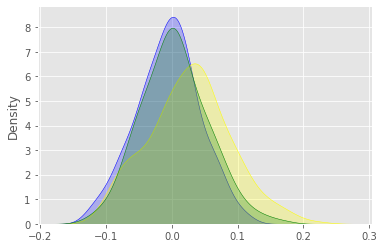

In [8]:
sns.kdeplot(confidence_m_neg, shade=True, color='blue')
sns.kdeplot(confidence_n_neg, shade=True, color='yellow')
sns.kdeplot(confidence_f_neg, shade=True, color='green')

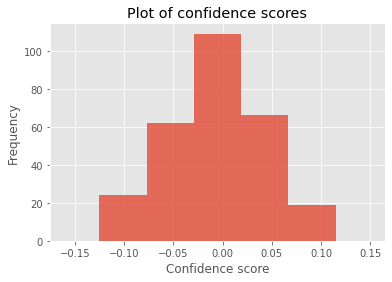

In [9]:
plt.xlim([min(confidence_m_neg)-0.05, max(confidence_m_neg)+0.05])
plt.hist(confidence_m_neg, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

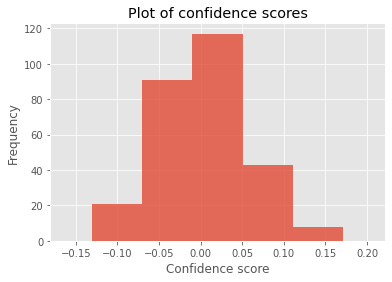

In [10]:
plt.xlim([min(confidence_f_neg)-0.05, max(confidence_f_neg)+0.05])
plt.hist(confidence_f_neg, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

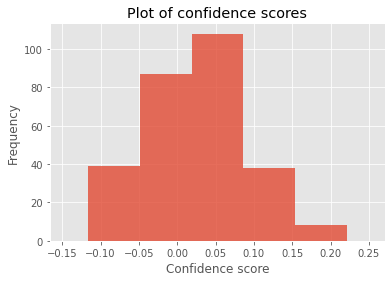

In [11]:
plt.xlim([min(confidence_n_neg)-0.05, max(confidence_n_neg)+0.05])
plt.hist(confidence_n_neg, bins=5, alpha=0.8)
plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

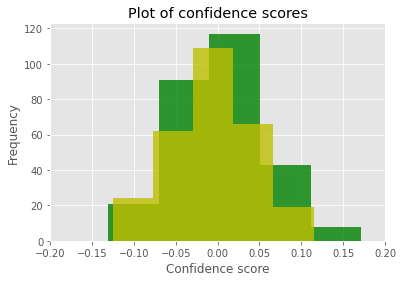

In [12]:
plt.xlim([-0.2, 0.2])
#plt.hist(confidence_n_neg, bins=5, alpha=0.8, color='w')
plt.hist(confidence_f_neg, bins=5, alpha=0.8, color='g')
plt.hist(confidence_m_neg, bins=5, alpha=0.8, color='y')

plt.title(f'Plot of confidence scores')
plt.xlabel('Confidence score')
plt.ylabel('Frequency')

plt.show()

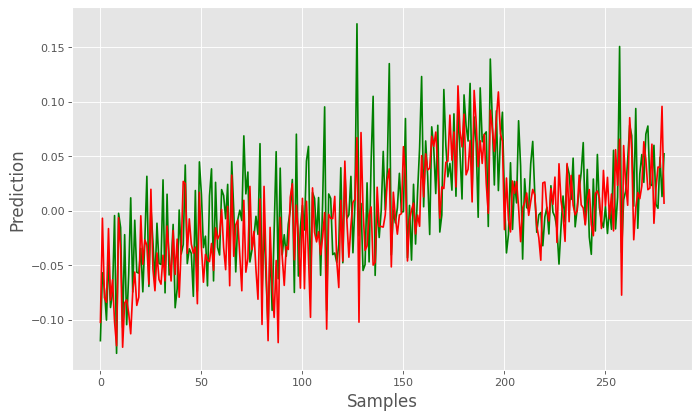

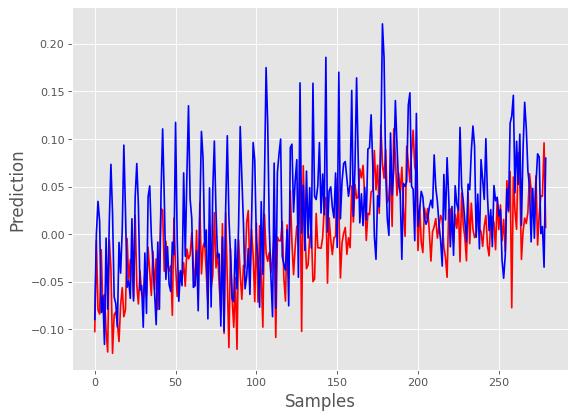

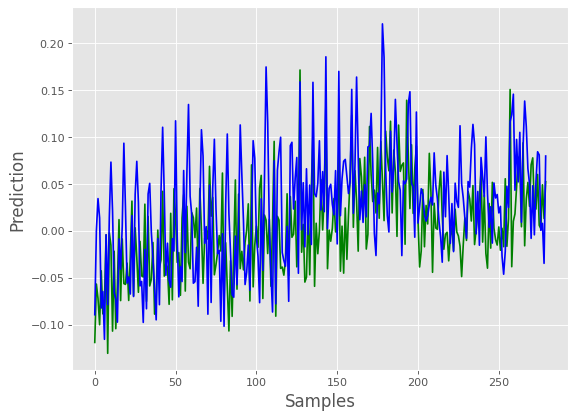

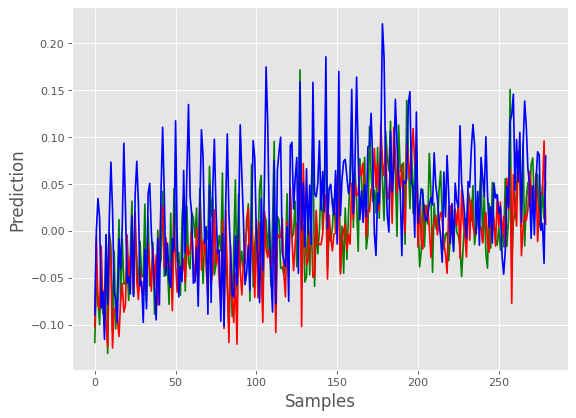

In [13]:
figure(figsize=(10, 6), dpi=80)

#sns.set_style("darkgrid")
x=np.arange(0, 280, 1)
plt.plot(x, confidence_f_neg, "g")
plt.plot(x, confidence_m_neg, "r")
#plt.plot(x, confidence_n_neg, "b")
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

print()
figure(figsize=(8, 6), dpi=80)

#plt.plot(x, confidence_f_neg, "g")
plt.plot(x, confidence_m_neg, "r")
plt.plot(x, confidence_n_neg, "b")
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()


print()
figure(figsize=(8, 6), dpi=80)

plt.plot(x, confidence_f_neg, "g")
#plt.plot(x, confidence_m_neg, "r")
plt.plot(x, confidence_n_neg, "b")
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

print()
figure(figsize=(8, 6), dpi=80)

plt.plot(x, confidence_f_neg, "g")
plt.plot(x, confidence_m_neg, "r")
plt.plot(x, confidence_n_neg, "b")
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

In [14]:
import math
diff_f_m=[confidence_f_neg[i]-confidence_m_neg[i] for i in range(280) if abs(confidence_f_neg[i]-confidence_m_neg[i])>=0.1]
diff_f_n=[confidence_f_neg[i]-confidence_n_neg[i] for i in range(280) if abs(confidence_f_neg[i]-confidence_n_neg[i])>=0.1]
diff_m_n=[confidence_m_neg[i]-confidence_n_neg[i] for i in range(280) if abs(confidence_m_neg[i]-confidence_n_neg[i])>=0.1]

#diff_m_n=[confidence_n_neg[i]-confidence_m_neg[i] for i in range(280)]
#diff_f_n=[confidence_f_neg[i]-confidence_n_neg[i] for i in range(280)]
print(len(diff_f_m))
print(len(diff_f_n))
print(len(diff_m_n))

4
34
38


In [15]:
import math
diff_f_m=[confidence_f_neg[i]-confidence_m_neg[i] for i in range(280) if abs(confidence_f_neg[i]-confidence_m_neg[i])>=0.05]
diff_f_n=[confidence_f_neg[i]-confidence_n_neg[i] for i in range(280) if abs(confidence_f_neg[i]-confidence_n_neg[i])>=0.05]
diff_m_n=[confidence_m_neg[i]-confidence_n_neg[i] for i in range(280) if abs(confidence_m_neg[i]-confidence_n_neg[i])>=0.05]


diff_f_m=[confidence_f_neg[i]-confidence_m_neg[i] for i in range(280)]
diff_m_n=[confidence_n_neg[i]-confidence_m_neg[i] for i in range(280)]
diff_f_n=[confidence_f_neg[i]-confidence_n_neg[i] for i in range(280)]
print(len(diff_f_m))
print(len(diff_f_n))
print(len(diff_m_n))

280
280
280


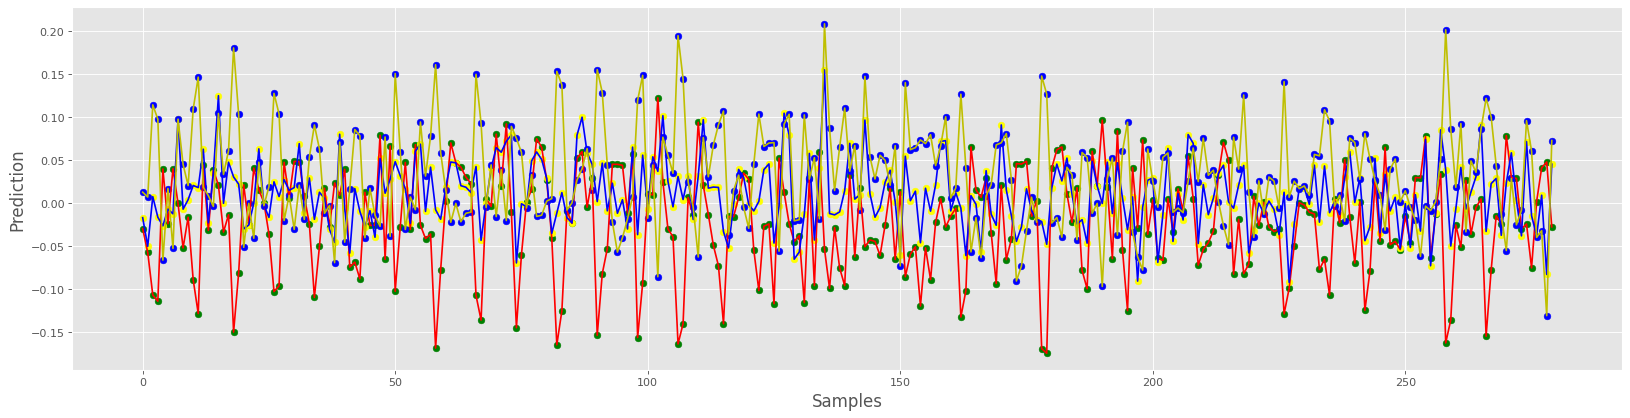

In [16]:
figure(figsize=(25, 6), dpi=80)

x=np.arange(0, len(diff_f_n), 1)
plt.plot(x, diff_f_n, "r")
plt.scatter(x, diff_f_n, alpha=1.0, color='green')

x=np.arange(0, len(diff_f_m), 1)
plt.plot(x, diff_f_m, "b")
plt.scatter(x, diff_f_m, alpha=1.0, color='yellow')

x=np.arange(0, len(diff_m_n), 1)
plt.plot(x, diff_m_n, "y")
plt.scatter(x, diff_m_n, alpha=1.0, color='blue')

plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

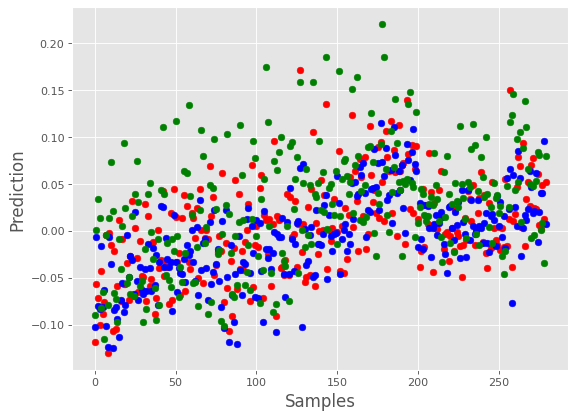

In [17]:
figure(figsize=(8, 6), dpi=80)
x=np.arange(0, 280, 1)

plt.scatter(x, confidence_f_neg, alpha=1.0, color='red')
plt.scatter(x, confidence_m_neg, alpha=1.0, color='blue')
plt.scatter(x, confidence_n_neg, alpha=1.0, color='green')
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

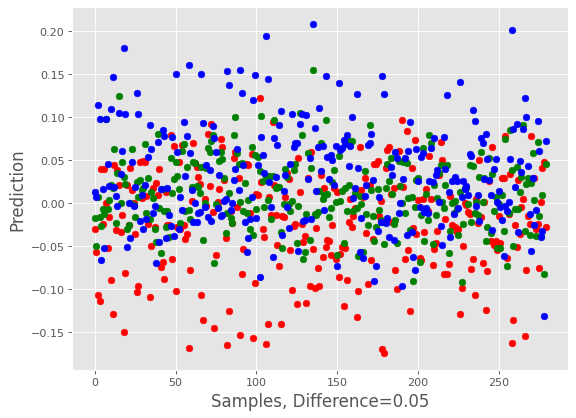

In [18]:
figure(figsize=(8, 6), dpi=80)

x=np.arange(0, len(diff_f_n), 1)
#plt.plot(x, diff_f_n, "r")
plt.scatter(x, diff_f_n, alpha=1.0, color='red')

x=np.arange(0, len(diff_f_m), 1)
#plt.plot(x, diff_f_m, "b")
plt.scatter(x, diff_f_m, alpha=1.0, color='green')

x=np.arange(0, len(diff_m_n), 1)
#plt.plot(x, diff_m_n, "y")
plt.scatter(x, diff_m_n, alpha=1.0, color='blue')

plt.xlabel("Samples, Difference=0.05",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

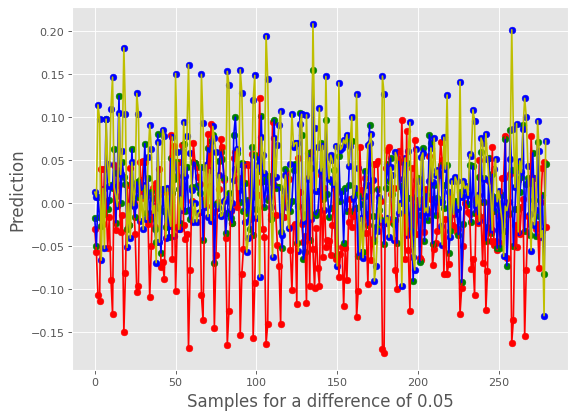

In [19]:
figure(figsize=(8, 6), dpi=80)

x=np.arange(0, len(diff_f_n), 1)
plt.plot(x, diff_f_n, "r")
plt.scatter(x, diff_f_n, alpha=1.0, color='red')

x=np.arange(0, len(diff_f_m), 1)
plt.plot(x, diff_f_m, "b")
plt.scatter(x, diff_f_m, alpha=1.0, color='green')

x=np.arange(0, len(diff_m_n), 1)
plt.plot(x, diff_m_n, "y")
plt.scatter(x, diff_m_n, alpha=1.0, color='blue')

plt.xlabel("Samples for a difference of 0.05",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

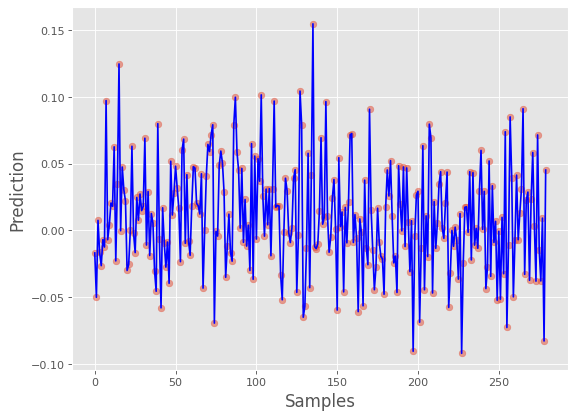

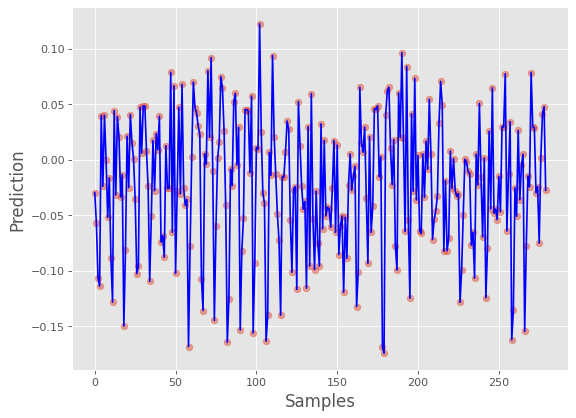

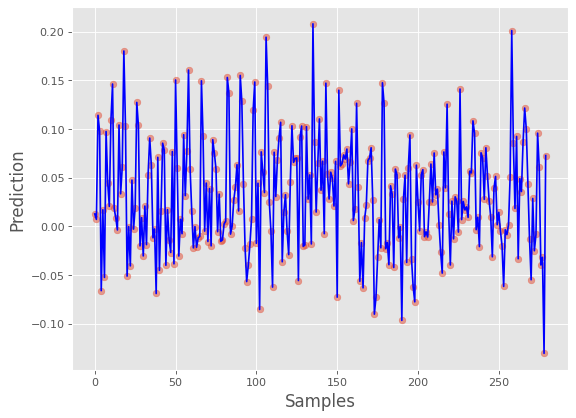

In [20]:
figure(figsize=(8, 6), dpi=80)
x=np.arange(0, len(diff_f_m), 1)

plt.plot(x, diff_f_m, "b")
plt.scatter(x, diff_f_m, alpha=0.5)
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

print()

x=np.arange(0, len(diff_f_n), 1)

figure(figsize=(8, 6), dpi=80)

plt.plot(x, diff_f_n, "b")
plt.scatter(x, diff_f_n, alpha=0.5)
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

print()

x=np.arange(0, len(diff_m_n), 1)

figure(figsize=(8, 6), dpi=80)

plt.plot(x, diff_m_n, "b")
plt.scatter(x, diff_m_n, alpha=0.5)
plt.xlabel("Samples",fontsize=15)
plt.ylabel("Prediction",fontsize=15)
plt.show()
plt.close()

In [21]:
from scipy.stats import ks_2samp
import numpy as np

print(ks_2samp(confidence_f_neg, confidence_m_neg))
print(ks_2samp(confidence_f_neg, confidence_n_neg))
print(ks_2samp(confidence_m_neg, confidence_n_neg))

Ks_2sampResult(statistic=0.08571428571428572, pvalue=0.25541286258739365)
Ks_2sampResult(statistic=0.21428571428571427, pvalue=4.829484348197874e-06)
Ks_2sampResult(statistic=0.29285714285714287, pvalue=5.4546167599492505e-11)


#Model

In [ ]:
import torch
import torchtext
from torchtext.legacy import data
from torchtext.legacy import datasets
import pandas as pd
from torch.utils.data import TensorDataset, DataLoader

twitter=pd.read_csv('Twitter_Data.csv')
#reddit=pd.read_csv('Reddit_Data.csv')
train=[]
train=list(twitter['clean_text'])
#for i in reddit['clean_comment']:
#  train.append(str(i))
labels=[]
labels=list(twitter['category'])
#for i in reddit['category']:
#  labels.append(i)


from string import punctuation
punctuation+="“"
punctuation+="”"
print(punctuation)

print(punctuation)
print(train[0])
all_text=""
# get rid of punctuation
for i in range(len(train)):
  train[i]=str(train[i]).lower()
  train[i]=''.join([c for c in train[i] if c not in punctuation])
  all_text+=train[i]+" "

words = all_text.split()

from collections import Counter

## Build a dictionary that maps words to integers
counts = Counter(words)
vocab = sorted(counts, key=counts.get, reverse=True)
vocab = ['unk']+vocab
print(vocab)
vocab_to_int = {word: ii for ii, word in enumerate(vocab, 1)}
## use the dict to tokenize each review in reviews_split
## store the tokenized reviews in reviews_ints
reviews_ints = []
for review in train:
    reviews_ints.append([vocab_to_int[word] for word in review.split()])
  
import numpy as np
encoded_labels = np.array([i+1 for i in labels])
print(encoded_labels[:10])

review_lens = Counter([len(x) for x in reviews_ints])

print('Number of reviews before removing outliers: ', len(reviews_ints))

## remove any reviews/labels with zero length from the reviews_ints list.

# get indices of any reviews with length 0
non_zero_idx = [ii for ii, review in enumerate(reviews_ints) if len(review) != 0]

# remove 0-length reviews and their labels
reviews_ints = [reviews_ints[ii] for ii in non_zero_idx]
encoded_labels = np.array([encoded_labels[ii] for ii in non_zero_idx])

print('Number of reviews after removing outliers: ', len(reviews_ints))

def pad_features(reviews_ints, seq_length):
    ''' Return features of review_ints, where each review is padded with 0's 
        or truncated to the input seq_length.
    '''
    
    # getting the correct rows x cols shape
    features = np.zeros((len(reviews_ints), seq_length), dtype=int)

    # for each review, I grab that review and 
    for i, row in enumerate(reviews_ints):
        features[i, -len(row):] = np.array(row)[:seq_length]
    
    return features

seq_length = 200
features = pad_features(reviews_ints, seq_length=seq_length)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~“”
!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~“”
when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit psus and temples
['unk', 'modi', 'the', 'and', 'for', 'you', 'not', 'will', 'this', 'india', 'are', 'that', 'with', 'has', 'have', 'but', 'all', 'from', 'his', 'was', 'they', 'bjp', 'who', 'people', 'what', 'congress', 'like', 'your', 'only', 'now', 'narendra', 'can', 'why', 'our', 'govt', 'its', 'about', 'one', 'vote', 'dont', 'him', 'just', 'when', 'their', 'modis', 'more', 'country', 'how', 'election', 'years', 'should', 'rahul', 'time', 'did', 'indian', 'any', 'nation', 'against', 'even', 'after', 'then', 'also', 'which', 'there', 'out', 'know', 'government', 'again', 'them', 'get', 'power', 'want', 'had', 'gandhi', 'minister', 'because', 'than', 'good', 'give', 'these', 'space', 'been', 'would', 'money', 'says', 'said', '

In [ ]:
split_frac = 0.8

## split data into training, validation, and test data (features and labels, x and y)

split_idx = int(len(features)*split_frac)
train_x, remaining_x = features[:split_idx], features[split_idx:]
train_y, remaining_y = encoded_labels[:split_idx], encoded_labels[split_idx:]

test_idx = int(len(remaining_x)*0.5)
val_x, test_x = remaining_x[:test_idx], remaining_x[test_idx:]
val_y, test_y = remaining_y[:test_idx], remaining_y[test_idx:]

## print out the shapes of your resultant feature data
print("\t\t\tFeature Shapes:")
print("Train set: \t\t{}".format(train_x.shape), 
      "\nValidation set: \t{}".format(val_x.shape),
      "\nTest set: \t\t{}".format(test_x.shape))

# create Tensor datasets
train_data = TensorDataset(torch.from_numpy(train_x), torch.from_numpy(train_y))
valid_data = TensorDataset(torch.from_numpy(val_x), torch.from_numpy(val_y))
test_data = TensorDataset(torch.from_numpy(test_x), torch.from_numpy(test_y))

# dataloaders
batch_size = 10

# make sure the SHUFFLE your training data
train_loader = DataLoader(train_data, shuffle=True, batch_size=batch_size,  drop_last=True)
valid_loader = DataLoader(valid_data, shuffle=True, batch_size=batch_size,  drop_last=True)
test_loader = DataLoader(test_data, shuffle=True, batch_size=batch_size,  drop_last=True)

# obtain one batch of training data
dataiter = iter(train_loader)
sample_x, sample_y = dataiter.next()

			Feature Shapes:
Train set: 		(130383, 200) 
Validation set: 	(16298, 200) 
Test set: 		(16298, 200)


In [ ]:
train_on_gpu=torch.cuda.is_available()

if(train_on_gpu):
    print('Training on GPU.')
else:
    print('No GPU available, training on CPU.')

Training on GPU.


In [ ]:
import torch.nn as nn

class SentimentRNN(nn.Module):
    """
    The RNN model that will be used to perform Sentiment analysis.
    """

    def __init__(self, vocab_size, output_size, embedding_dim, hidden_dim, n_layers, drop_prob=0.5):
        """
        Initialize the model by setting up the layers.
        """
        super(SentimentRNN, self).__init__()

        self.output_size = output_size
        self.n_layers = n_layers
        self.hidden_dim = hidden_dim
        
        # embedding and LSTM layers
        self.embedding = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, n_layers, 
                            dropout=drop_prob, batch_first=True)
        
        # dropout layer
        self.dropout = nn.Dropout(0.3)
        
        # linear and sigmoid layers
        self.fc = nn.Linear(hidden_dim, output_size)
        self.sof = nn.Softmax()
        

    def forward(self, x, hidden):
        """
        Perform a forward pass of our model on some input and hidden state.
        """
        batch_size = x.size(0)

        # embeddings and lstm_out
        x = x.long()
        embeds = self.embedding(x)
        lstm_out, hidden = self.lstm(embeds, hidden)
        
        lstm_out = lstm_out[:, -1, :] # getting the last time step output
        
        # dropout and fully-connected layer
        out = self.dropout(lstm_out)
        out = self.fc(out)
        # sigmoid function
        sof_out = self.sof(out)
        
        # return last sigmoid output and hidden state
        return sof_out, hidden
    
    
    def init_hidden(self, batch_size):
        ''' Initializes hidden state '''
        # Create two new tensors with sizes n_layers x batch_size x hidden_dim,
        # initialized to zero, for hidden state and cell state of LSTM
        weight = next(self.parameters()).data
        
        if (train_on_gpu):
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda(),
                  weight.new(self.n_layers, batch_size, self.hidden_dim).zero_().cuda())
        else:
            hidden = (weight.new(self.n_layers, batch_size, self.hidden_dim).zero_(),
                      weight.new(self.n_layers, batch_size, self.hidden_dim).zero_())
        
        return hidden

# Instantiate the model w/ hyperparams
vocab_size = len(vocab_to_int)+1 # +1 for the 0 padding + our word tokens
output_size = 3
embedding_dim = 400
hidden_dim = 256
n_layers = 2

model = SentimentRNN(vocab_size, output_size, embedding_dim, hidden_dim, n_layers)

print(model)
model.load_state_dict(torch.load('Model'))
device = torch.device('cuda:0')
model = model.to(device)

SentimentRNN(
  (embedding): Embedding(111234, 400)
  (lstm): LSTM(400, 256, num_layers=2, batch_first=True, dropout=0.5)
  (dropout): Dropout(p=0.3, inplace=False)
  (fc): Linear(in_features=256, out_features=3, bias=True)
  (sof): Softmax(dim=None)
)


In [ ]:
# loss and optimization functions
"""
lr=0.001

criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

epochs = 2 # 3-4 is approx where I noticed the validation loss stop decreasing

counter = 0
print_every = 100
clip=5 # gradient clipping

# move model to GPU, if available
if(train_on_gpu):
    model.cuda()

model.train()
# train for some number of epochs
for e in range(epochs):
    # initialize hidden state
    h = model.init_hidden(batch_size)

    # batch loop
    for inputs, labels in train_loader:
        counter += 1

        if(train_on_gpu):
            inputs, labels = inputs.cuda(), labels.cuda()

        # Creating new variables for the hidden state, otherwise we'd backprop through the entire training history
        h = tuple([each.data for each in h])

        # zero accumulated gradients
        model.zero_grad()

        # get the output from the model
        output, h = model(inputs, h)

        # calculate the loss and perform backprop
        loss = criterion(output.squeeze(), labels.long())
        loss.backward()
        # `clip_grad_norm` helps prevent the exploding gradient problem in RNNs / LSTMs.
        nn.utils.clip_grad_norm_(model.parameters(), clip)
        optimizer.step()

        # loss stats
        if counter % print_every == 0:
            # Get validation loss
            val_h = model.init_hidden(batch_size)
            val_losses = []
            model.eval()
            for inputs, labels in valid_loader:

                # Creating new variables for the hidden state, otherwise
                # we'd backprop through the entire training history
                val_h = tuple([each.data for each in val_h])

                if(train_on_gpu):
                    inputs, labels = inputs.cuda(), labels.cuda()

                output, val_h = model(inputs, val_h)
                val_loss = criterion(output.squeeze(), labels.long())
                val_losses.append(val_loss.item())

            model.train()
            print("Epoch: {}/{}...".format(e+1, epochs),
                  "Step: {}...".format(counter),
                  "Loss: {:.6f}...".format(loss.item()),
                  "Val Loss: {:.6f}".format(np.mean(val_losses)))"""

In [ ]:
#torch.save(model.state_dict(), 'Model')

In [ ]:
from string import punctuation

def tokenize_(test):
    #print(test)
    test= test.lower() # lowercase
    # get rid of punctuation
    txt = ''.join([c for c in test if c not in punctuation])

    # splitting by spaces
    testwords = txt.split()

    # tokens
    conv_int = []
    conv_int.append([vocab_to_int.get(word, 0) for word in testwords])

    return conv_int
sample = 'This is the worst movie I have seen, and the acting was terrible.'
output_ints = tokenize_(sample)
#print(output_ints)
features = pad_features(output_ints, seq_length)
feature_tensor = torch.from_numpy(features)

def predict(test_, sequence_length=200):
    model.eval()
    # tokenize review
    op = tokenize_(test_)
    
    # pad tokenized sequence
    seq_length=sequence_length
    features = pad_features(op, seq_length)
    # convert to tensor to pass into your model
    feature_tensor = torch.from_numpy(features)
    
    batch_size = feature_tensor.size(0)
    
    # initialize hidden state
    h = model.init_hidden(batch_size)
    
    if(train_on_gpu):
        feature_tensor = feature_tensor.cuda()
    
    # get the output from the model
    output, h = model(feature_tensor, h)
    
    # convert output probabilities to predicted class (0 or 1)
    pred = torch.round(output.squeeze()) 
    # printing output value, before rounding
    #print('Prediction value, pre-rounding:', output)
    
    # print custom response
    pred_=torch.argmax(output)
    """if(pred_==0):
      print("It is a negative review")
    if(pred_==1):
      print("It is a neutral review")
    if(pred_==2):
      print("It is a positive review")"""
    return output.detach().cpu().numpy()

In [ ]:
sent=""
probs=predict(sent, seq_length)

#Explanations

In [ ]:
from lime import lime_text
from lime.lime_text import LimeTextExplainer

In [ ]:
def predict_text(text):
  global num_
  outputs_=[]
  text=[i if len(i.strip())>1 else 'unk' for i in text]
  num_=len(text)
  #print(num_)
  for i in text:
    #print("Sentence", i)
    outputs_+=(predict(i).tolist())
  outputs_=np.array(outputs_)
  #print(outputs_)
  return outputs_


In [ ]:
num_=5
explainer = LimeTextExplainer(class_names=['Negative','Neutral','Positive'])
sentences=["This is one of the best movie", "Hello, you suck balls"]
#exp = explainer.explain_instance(train[0], c.predict_proba, num_features=8)
explanation = explainer.explain_instance(sentences[0], predict_text, num_features=10, num_samples=100, top_labels=3, distance_metric='cosine')
explanation.show_in_notebook(text=True, predict_proba=False)

In [ ]:
avg_f=0
avg_m=0
confidence_m=[]
confidence_f=[]
for i in range(len(m)):
  explanation = explainer.explain_instance(m[i], predict_text, num_features=10, num_samples=3, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  for item in explanation.as_list():
    if(str(item[0]).lower() in masculine):
      avg_m+=float(item[1])
      confidence_m.append(float(item[1]))
print()
print()
for i in range(len(fe)):
  explanation = explainer.explain_instance(fe[i], predict_text, num_features=10, num_samples=3, top_labels=3, distance_metric='cosine')
  #print(explanation.as_list())
  for item in explanation.as_list():
    if(str(item[0]).lower() in feminine):
      avg_f+=float(item[1])
      confidence_f.append(float(item[1]))